---
#P8 - Participez à une compétition Kaggle
- Chacune des cellules nécessite à priori l'exécution de ces 4 permières
- https://www.kaggle.com/c/jigsaw-multilingual-toxic-comment-classification #Lien vers la compétition Kaggle
- https://www.kaggle.com/benjaminfontaine/xlm-roberta-toxicity-predictions/ #Lien vers le notebook Kaggle allégé
---

In [1]:
Pkey = 'p77'
if'MainFrame and Functions':
    import os
    #
    os.system('rm -rf sample_data;pip install unidecode transformers pysftp webptools;rm -f gv.py alpow.py;wget https://alpow.fr/alpow.py;wget https://alpow.fr/gv.py')
    import alpow
    from alpow import *
    SG('nbname', Pkey)
    bgon()  # monitoring on
    SG('webRepo', 'https://1.x24.fr/a/jupyter/')
    SG('sftp', {'cd': 'poc7', 'web': GG('webRepo'), 'h': '-',
                'u': '-', 'p': '-'})  # SG('useFTP',False);#ReadOnly
    SG('useFTP', False)  # Write Access

    def load(fn='allVars', onlyIfNotSet=1):
        fns = fn.split(',')
        for fn in fns:
            fn = fn.strip(', \n')
            ok = 1
            if(len(fn) == 0):
                continue
            if(onlyIfNotSet):
                if fn in globals().keys():
                    # override empty lists, dict, dataframe and items
                    if isinstance(globals()[fn], type):
                        continue
                    elif isinstance(globals()[fn], pd.DataFrame):
                        if globals()[fn].shape[0] > 0:
                            continue
                    elif(isinstance(globals()[fn], dict)):
                        if(len(globals()[fn]) > 0):
                            continue
                    elif(isinstance(globals()[fn], list)):
                        if(len(globals()[fn]) > 0):
                            continue
                    elif(isinstance(globals()[fn], scipy.sparse.csr.csr_matrix)):
                        if(globals()[fn].shape[0] > 0):
                            continue
                    elif(isinstance(globals()[fn], np.ndarray)):
                        if(globals()[fn].shape[0] > 0):
                            continue
        # si déjà définie, passer au prochain
                    elif(globals()[fn]):
                        continue
            globals().update(alpow.resume(fn))
        # endfor fn
        return

    def extract(x):
        liste = list(x.keys())
        for i in liste:
            globals()[i] = x[i]
        p('extracted : ', ','.join(liste))

    # jeuDonnees=compact('y_test,')
    def compact(variables):
        x = {}
        for i in variables.split(','):
            x[i] = globals()[i]
        p('compacted : ', variables)
        return x

    def loadIfNotSet(x):
        if x not in globals().keys():
            load(x)

    def save(
        exc=[],
        fn='allVars',
        include=False,
        backup=False,
        ftp=True,
        cleanup=False,
        zip=True,
        authTypes=[
            str,
            dict,
            list,
            int,
            np.ndarray,
            pd.DataFrame,
            pd.Series]):
        if (not GG('useFTP')) | (GG('sftp')['h'] == '-'):
            p('ftp offline')
            return

        global ftplist
        if(isinstance(exc, str)):  # quicksave single var
            excs = exc.split(',')
            for exc in excs:
                exc = exc.strip(', \n')
                if(len(exc) == 0):
                    continue
                fn = exc
                include = [exc]
                exc = []
                alpow._save(
                    globals(),
                    exclusions=exc,
                    fn=fn,
                    include=include,
                    backup=backup,
                    ftp=ftp,
                    cleanup=cleanup,
                    zip=zip,
                    authTypes=False)
            # p(excs)
            return 1
        elif exc == []:
            exc = exclusions
        alpow._save(
            globals(),
            exclusions=exc,
            fn=fn,
            include=include,
            backup=backup,
            ftp=ftp,
            cleanup=cleanup,
            zip=zip,
            authTypes=authTypes)

    if 'project specific functions':
        from time import time, sleep
        from ipywidgets import IntProgress
        from IPython.display import display

        MAX_LEN = 192  # is input 1
        from IPython.display import clear_output
        import tensorflow.keras.backend as K
        import scipy

    def extractionMots3(x):
        import re
        import unidecode
        # x=x.lower()#uppercase is sign of agacement ou affirmation autoritaire
        x = unidecode.unidecode(x)
        x = re.sub('\n+', '.', x)  # newline
        x = re.sub(r'\.+', '.', x)  # single separator
        x = re.sub(r'@[a-zA-Z0-9\_]+', '', x)  # strip usernames
        x = re.sub(
            r'[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}',
            '',
            x)  # strip ips
        x = re.sub(r':[a-zA-Z0-9\_]+', '', x)  # kindof
        # strip urls with negative lookahead :)
        x = re.sub(r'https?\S+(?=\s|$)', '', x)
        # suppression tags ouverture et fermeture ( conservant leur contenus
        # interne : code, texte mis en forme, etc .. )
        notags = re.sub('<[^<]+?>', '', x)
        noHTMLentities = re.sub(
            '&[^;]{1,9};', '', notags)  # cleanup &amp; &gt &lt
        stripped = re.sub(
            r"[^a-zA-Z0-9',.!\?]+",
            ' ',
            noHTMLentities,
            flags=re.IGNORECASE)  # autres que caractères de base
        monospaced = re.sub(r'\s+', ' ', stripped)
        trimmed = monospaced.strip(' .')
        return trimmed
        # ***************************
        lemitized = lemitizeWords(stripped)
        # i => retire du sens à la phrase conserve plupart mots clefs
        noStopWords = stopWordsRemove(lemitized)
        return trimAloneNumbers(noStopWords)

    def cc():
        ''' clear cache, free ram '''
        K.clear_session()
        gc.collect()
        if not tpu:
            torch.cuda.empty_cache()  # OOM at 16 iterations, which variable ????
    '''notebook global variables scope'''

    def SG1(var, data):
        globals()[var] = data

    def GG1(var):
        if gke(var):
            return globals()[var]
        return None

    def gke(x):
        pk = globals().keys()
        if x in pk:
            return True
        return False

    def deli(xs, callback=nf):
        p(ramUsage(), end=':')
        for x in xs.split(','):
            if x in globals().keys():
                globals()[x] = None
                del(globals()[x])
                callback(x)
                p(x, end=',')
            gc.collect()
        p('=>', ramUsage())

    def extractionMots4(x):
        ''' text cleanup : retrait des accents, harmonisation ponctuation, retrait de références, tags, hyperliens, caractères spéciaux '''
        import re
        import unidecode
        x = x.lower()  # uppercase is sign of agacement ou affirmation autoritaire ?
        #x = unidecode.unidecode(x)
        x = re.sub('\n+', '.', x)  # newline
        x = re.sub(r'\.+', '.', x)  # single separator
        x = re.sub(r'@[a-zA-Z0-9\_]+', '', x)  # strip usernames
        x = re.sub(
            r'[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}',
            '',
            x)  # strip ips
        x = re.sub(r':[a-zA-Z0-9\_]+', '', x)  # kindof
        # strip urls with negative lookahead :)
        x = re.sub(r'https?\S+(?=\s|$)', '', x)
        # suppression tags ouverture et fermeture ( conservant leur contenus
        # interne : code, texte mis en forme, etc .. )
        notags = re.sub('<[^<]+?>', '', x)
        noHTMLentities = re.sub(
            '&[^;]{1,9};', '', notags)  # cleanup &amp; &gt &lt
        stripped = re.sub(
            r"[^a-zA-Z0-9',.!\?]+",
            ' ',
            noHTMLentities,
            flags=re.IGNORECASE)  # autres que caractères de base
        monospaced = re.sub(r'\s+', ' ', stripped)
        trimmed = monospaced.strip(' .')
        return trimmed

    from operator import itemgetter

    run = lastexec = datetime.datetime.now().strftime("%Y%m%d-%H%M")
    p(lastexec)
    ftpls()
    scores8 = {}
    scores9 = {}
    score11 = {}
    rocPerLangAndModel = {}
    load('rocPerLangAndModel,scores8,scores9,score11')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Last Run: 2020-05-26 06:51:43.153803
Trying to install : wget
20200526-0651


---
##A) Functions
---

In [0]:
import torch
import os
from sklearn.metrics import roc_auc_score
import sklearn.model_selection
from tensorflow.keras import backend as K
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tqdm.notebook import tqdm
from transformers import TFAutoModel, AutoTokenizer
import transformers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input
import tensorflow.keras.backend as K
import tensorflow as tf
import pandas as pd
import numpy as np
tpu = False
shallRestart = False
# pip install kaggle_datasets
!pip install transformers
#from kaggle_datasets import KaggleDatasets


def TraitementTexte(x, mod):
    '''
    TraitementTexte(phrase,MultiplicationDeChiffresPremiersCiDessous)
    #5*7*11*13*17 supposé être le meilleur
    mais 17 en réalité
    '''
    if(mod == 1):
        return x
    import re
    import unidecode
    # x=#uppercase is sign of agacement ou affirmation autoritaire
    if(mod % 2 == 0):
        x = unidecode.unidecode(x)
    if(mod % 3 == 0):
        x = x.lower()
    if(mod % 5 == 0):
        x = re.sub(r'\s+', ' ', x)
    if(mod % 7 == 0):
        x = re.sub(r'https?\S+(?=\s|$)', '', x)
    if(mod % 11 == 0):
        x = re.sub('<[^<]+?>', '', x)  # clear innter HTML tags
    if(mod % 13 == 0):
        x = re.sub('&[^;]{1,9};', '', x)  # htmlentitites
    if(mod % 17 == 0):  # tutti
        x = re.sub(r"[^a-zA-Z0-9',.!\?]+", ' ', x, flags=re.IGNORECASE)
    if(mod % 19 == 0):
        x = x.strip(' .')
    # 23,29,31,37,41,
    return x


def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    https://www.kaggle.com/xhlulu/jigsaw-tpu-distilbert-with-huggingface-and-keras
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []

    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i + chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])

    return np.array(all_ids)


def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        return_attention_masks=False,
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )

    return np.array(enc_di['input_ids'])


# First load the real tokenizer
AUTO = tf.data.experimental.AUTOTUNE

# Data access
#GCS_DS_PATH = KaggleDatasets().get_gcs_path()


def build_model(transformer, max_len=512):
    """
    https://www.kaggle.com/xhlulu/jigsaw-tpu-distilbert-with-huggingface-and-keras
    """
    input_word_ids = Input(
        shape=(
            max_len,
        ),
        dtype=tf.int32,
        name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, ac='sigmoid')(cls_token)
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(
        Adam(
            lr=1e-5),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model


# Configuration
EPOCHS = 2

rdSeed = 1984


def seed_everything(seed=rdSeed):
    tf.random.set_seed = seed
    # random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True


seed_everything(rdSeed)


def focal_loss(gamma=1.5, alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - \
            K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed


def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)


freeze = False
o2 = offset = 0
EPOCHS = 1
# et les prédictions à vide ?
# charger les poids d'un entrainement précédent semble être une bonne
# chose, non ?


if False:
    mdlname = 'poc76j2_distilMulti'
    mdl = 'distilbert-base-multilingual-cased'
    ml = 192
    tokenizer = AutoTokenizer.from_pretrained(mdl)

    x = 'distillbert_validationFinaleCleaned'
    load('pMulti2,pMulti_encoded_multiDistil_192,' + x)
    encodedTexts = pMulti_encoded_multiDistil_192
    distillEncoded = pMulti2

if False:
    if(x not in globals().keys()):
        load('testDf')
        vf = testDf['content'].values
        vf = [extractionMots3(i) for i in vf]
        validationFinaleCleaned = regular_encode(vf, tokenizer, maxlen=ml)
        save(x)

    validationFinaleCleaned = GG1(x)


def auc(xtest, ytest, predictions=False):
    global testPred
    f1 = 0
    if predictions:
        testPred = predictions
    else:
        testPred = model.predict(xtest, batch_size=bs, verbose=1)
    testPred2 = pd.DataFrame(testPred)
    testPred2.loc[testPred2[0] >= 0.5, 0] = True
    testPred2.loc[testPred2[0] < 0.5, 0] = False
    testPred3 = [i[0] for i in list(testPred2.values)]
    rocAucScore = sklearn.metrics.roc_auc_score(testPred3, ytest)
    r2 = sklearn.metrics.r2_score(testPred, ytest)  # .65
    # f1=sklearn.metrics.f1_score(testPred,ytest)#0.82 <= problem here :
    # Classification metrics can't handle a mix of binary and continuous
    # targets / or continuous
    return rocAucScore, r2, f1


def getModel(
        mdlname,
        mdl,
        inputLen,
        loss='binary_crossentropy',
        nbOut=1,
        dense=0,
        freeze=0):
    import tensorflow as tf
    @tf.function(experimental_relax_shapes=True)
    def f(x):
        return x
    from tensorflow.keras.layers import Dense, Input
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.models import Model
    from transformers import TFAutoModel, AutoTokenizer
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D

    with strategy.scope():
        transformer_layer = TFAutoModel.from_pretrained(mdl)  # large is > base
        input_word_ids = Input(
            shape=(
                inputLen,
            ),
            dtype=tf.int32,
            name="input_word_ids")
        sequence_output = transformer_layer(input_word_ids)[0]
        cls_token = sequence_output[:, 0, :]
        if dense > 0:
            dense_layer = Dense(dense, activation='relu')(cls_token)
            # 32 nuances#bcp plus lourd à entrainer !
            out = Dense(nbOut, activation='sigmoid')(dense_layer)
        else:
            out = Dense(nbOut, activation='sigmoid')(
                cls_token)  # , dtype='float16'
        mdl = Model(inputs=input_word_ids, outputs=out)
        mdl._name = mdlname
        if type(freeze) is not int:
            for layer in mdl.layers:
                if(type(layer) == freeze):
                    p(layer, 'not trainable')
                    layer.trainable = False

        mdl.compile(
            tf.keras.optimizers.Adam(
                lr=1e-5),
            loss=loss,
            metrics=[
                tf.keras.metrics.AUC(),
                'accuracy'])

    return mdl

# GG1(Pkey+'_fullHistory')


clear_output()
# indexes=distillEncoded.index.values;p(unik(distillEncoded['lang']));
shallRestart = False
# os.system('rm check*.h5 check*.h5.zip')#clear previous checkpoints
# **************************************************************************************
shallRestart = 0
tpu = False
c = 0
EPOCHS = 1
nbSplits = 10
bs = 8 * 128
roundIt = False  # distill:256,4


---
##B) TPU Inline
---

In [3]:
if 'select right processor type':#not tpu:
  try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
  except ValueError:
    tpu = None

  if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    message('tpu inline')
  else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    message('not tpu')
    strategy = tf.distribute.get_strategy()     
     
clear_output()
print("REPLICAS: ", strategy.num_replicas_in_sync)
p(datetime.datetime.now().strftime("%Y%m%d-%H%M"))
nbSplits=10;bs=8*128;roundIt=True

REPLICAS:  8
20200526-0653


---
##C) Training Functions
---

In [0]:
c = departx = departy = 0
if(shallRestart):
    x = y = xv = yv = trainI = testI = model = None
    deli('x,y,xv,yv,trainI,model')
    cc()
    tf.tpu.experimental.initialize_tpu_system(tpu)
    mdlname = 'distil192'
    mdl = 'distilbert-base-multilingual-cased'
    ml = 192
    model = getModel(mdlname, mdl, ml)
    x = 'p77d3_MultiDistil192_checkpoint0-3.h5'
    model.load_weights(x)  # checkpoint4.h5
# byzare, le chargement des meilleurs poids n'améliore en aucun cas l'accuracy de ce dernier ..
# clear_output()


class LossHistory(tf.keras.callbacks.Callback):
    def __init__(
        self,
        logs={
            'auc': [],
            'losses': [],
            'val_losses': [],
            'accuracy': [],
            'val_accuracy': []}):
        if 'auc' not in logs.keys():
            logs['auc'] = []
        self.auc = logs['auc']
        self.losses = logs['losses']
        self.val_losses = logs['val_losses']
        self.accuracy = logs['accuracy']
        self.val_accuracy = logs['val_accuracy']

    def on_batch_end(self, batch, logs={}):
        self.accuracy.append(logs.get('accuracy'))
        if('auc' in logs.keys()):
            self.auc.append(logs.get('auc'))
        if('val_accuracy' in logs.keys()):
            self.val_accuracy.append(logs.get('val_accuracy'))
        if('val_loss' in logs.keys()):
            self.val_losses.append(logs.get('val_loss'))
        self.losses.append(logs.get('loss'))


departx = departy = 0


def trainLoop(mon='val_accuracy', minmax='max', skfSplits=10):
    ''' Pour chaque modèle le split stratifié d'entrainement '''
    skf = sklearn.model_selection.StratifiedShuffleSplit(
        n_splits=skfSplits, random_state=1984)
    global j, c, cpf, history, histo, x, y, xv, yv, acc2checkpoint, val_acc2checkpoint, departx, departy, loss_2checkpoint
    loss_2checkpoint = {}
    acc2checkpoint = {}
    val_acc2checkpoint = {}
    load('loss_2checkpoint,acc2checkpoint,val_acc2checkpoint')
    globals()[Pkey] = {}
    globals()[Pkey + '_hist'] = []
    load(Pkey + ',' + Pkey + '_hist')
    history = LossHistory()
    # model=getModel(mdlname,mdl,ml);getFile(lastCheckpoint);model.load_weights(lastCheckpoint)#AdaDelta
    for fold, (trainI, testI) in enumerate(skf.split(indexes, df['lang'])):
        if fold < departx:
            p('fold', fold, '<', departx)
            continue
        # clear_output()#wait=True = wait for next print operation to complete
        p('_' * 180)
        # Permet de bypasser message: cant serialize
        splits = np.array_split(trainI, nbSplits)  # depend du TPU
        trainm = int(len(trainI) / 2)
        testm = int(len(testI) / 2)
        p(fold, end=':')
        a = time()

        if'compute test train data':
            sel = df.loc[testI]
            xv = np.array(itemgetter(*testI)(encodedTexts))
            yv = sel['toxic'].values
            if roundIt:
                yv = yv.round().astype('bool')

        j = 0
        for split in splits:
            p(j, end=',')
            j += 1
            if j < departy:
                p(j, '<', departy)
                continue
            departx = departy = 0  # paré à résumer l'entrainement :: reset values

            cpf = Pkey + '_checkpoint' + str(fold) + '-' + str(j) + '.h5'
            # ,dtype='int64' allready
            x = np.array(itemgetter(*split)(encodedTexts))
            #x=regular_encode(sel['comment_text'].values, tokenizer, maxlen=ml)
            y = df.loc[split]['toxic'].values
            if roundIt:
                y = y.round().astype('bool')
            a = time()
            Checkpoint = tf.keras.callbacks.ModelCheckpoint(
                cpf,
                monitor='val_loss',
                verbose=1,
                save_best_only=True,
                save_weights_only=True,
                mode='min')
            # Checkpoint=tf.keras.callbacks.ModelCheckpoint(cpf,monitor='val_auc',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
            # #val_auroc
            histo = model.fit(
                x, y, validation_data=(
                    xv, yv), epochs=EPOCHS, callbacks=[
                    history, Checkpoint], batch_size=bs)
            globals()[Pkey + '_hist'] += [histo.history]
            SG1(Pkey + '_last', [fold, j])
            save(Pkey + '_last')
            acc2checkpoint[cpf] = histo.history['accuracy']
            val_acc2checkpoint[cpf] = histo.history['val_accuracy']
            loss_2checkpoint[cpf] = histo.history['loss']
            b = time() - a
            c += b
            p('_')
            x = y = None
            cc()
        ftpput(cpf)
        SG1(Pkey + '_lastCheckpoint', cpf)
        save(Pkey + '_lastCheckpoint,acc2checkpoint,val_acc2checkpoint,loss_2checkpoint')
        kk = list(globals()[Pkey].keys())
        nk = int(datetime.datetime.now().strftime("%y%m%d%H%M"))  # fold
        while nk in kk:
            nk += '_1'
        globals()[Pkey][nk] = model.predict(valDf, batch_size=bs, verbose=1)
        save(Pkey + ',' + Pkey + '_hist')
        # xv=yv=None
        cc()
        continue
        # *************************************************************

        if False:
            a = time()
            Checkpoint = tf.keras.callbacks.ModelCheckpoint(
                cpf,
                monitor='val_loss',
                verbose=1,
                save_best_only=True,
                save_weights_only=True,
                mode='min')
            hist = model.fit(
                x,
                y,
                validation_data=(
                    xv,
                    yv),
                epochs=EPOCHS,
                callbacks=[Checkpoint],
                batch_size=bs)
            hist = model.fit(x[0:trainm], y[0:trainm], validation_data=(
                xv[0:testm], yv[0:testm]), epochs=EPOCHS, callbacks=[Checkpoint], batch_size=bs)
            globals()[Pkey + '_hist'] += [hist.history]
            hist = model.fit(x[trainm:x.shape[0]],
                             y[trainm:x.shape[0]],
                             validation_data=(xv[testm:xv.shape[0]],
                                              yvv[testm:xv.shape[0]]),
                             epochs=EPOCHS,
                             callbacks=[Checkpoint],
                             batch_size=bs)
            globals()[Pkey + '_hist'] += [hist.history]
        # hist=model.fit(x,y,validation_data=(xv,yv),epochs=EPOCHS,callbacks=[Checkpoint],batch_size=bs)#steps_per_epoch=1,,callbacks=[es],validation_data=(x2,y2),
            ftpput(cpf)
            b = time() - a
            c += b

        if False & bool('split in batches'):
            if False:
                x = 'FED_TestX_' + str(fold)
                load(x)  # save once
                if x not in globals().keys():
                    globals()[x] = regular_encode(
                        sel['comment_text'].values, tokenizer, maxlen=MAX_LEN)
                    save(x)

            nb = len(trainI) / trainMaxSize
            p(fold,
              len(trainI),
                len(testI),
                trainI[0],
                testI[0],
                'nb:',
                nb)  # 2943557 input records
            Batches = np.array_split(trainI, nb)
            for j in range(0, len(Batches)):
                trainI2 = Batches[j]
                p('batch:', j, '/', nb, ':', len(trainI2))

                sel = encodedDf.loc[trainI2]
                if False:
                    x = 'FED_TrainX_' + str(fold) + '_' + str(j)
                    load(x)  # save once
                    if x not in globals().keys():
                        globals()[x] = regular_encode(
                            sel['comment_text'].values, tokenizer, maxlen=MAX_LEN)
                        save(x)

                if bool('compute tain data'):
                    x = sel['comment_text'].values
                    y = sel['toxic'].values
                    if roundIt:
                        y = y.round().astype('bool')

                a = time()
                Checkpoint = tf.keras.callbacks.ModelCheckpoint(
                    cpf,
                    monitor=mon,
                    verbose=1,
                    save_best_only=True,
                    save_weights_only=True,
                    mode=minmax)
                hist = model.fit(
                    x, y, epochs=EPOCHS, callbacks=[
                        history, Checkpoint], batch_size=bs, validation_data=(
                        xv, yv))  # steps_per_epoch=1,,callbacks=[es],validation_data=(x2,y2),
                b = time() - a
                c += b

            # model.load_weights(cpf)
            globals()[Pkey] += [model.predict(validationFinaleCleaned,
                                              batch_size=bs, verbose=1)]
            save(Pkey)
            depart = j + 1  # inc
            cc()
            depart = j + 1  # inc

        save(Pkey + ',' + Pkey + '_hist')
        depart = fold + 1  # inc
        cc()
    p(c)
    hist = {
        'losses': history.losses,
        'val_losses': history.val_losses,
        'accuracy': history.accuracy,
        'val_accuracy': history.val_accuracy}
    SG1(Pkey + '_fullHistory', hist)

    save('acc2checkpoint')
    p('auc/r2 train', auc(np.concatenate([x, xv]), np.concatenate([y, yv])))


def trainLoop2(mon='loss', minmax='min', skfSplits=50):
    ''' Faster Pour chaque modèle le split stratifié d'entrainement Simple '''
    global rdSeed, lastLoss, splits, j, c, cpf, history, histo, x, y, xv, yv, acc2checkpoint, val_acc2checkpoint, departx, departy, loss_2checkpoint
    loss_2checkpoint = {}
    acc2checkpoint = {}
    val_acc2checkpoint = {}
    load('loss_2checkpoint,acc2checkpoint,val_acc2checkpoint')
    globals()[Pkey] = {}
    globals()[Pkey + '_hist'] = []
    load(Pkey + ',' + Pkey + '_hist')
    if not gke('lastLoss'):
        lastLoss = 999999
    p(skfSplits, 'splits')
    splits = np.array_split(indexes, skfSplits)  # depend du TPU
    a = time()
    j = 0
    if False:
        split = splits[-1]  # validation is last split
        # ,dtype='int64' allready
        xv = np.array(itemgetter(*split)(encodedTexts))
        yv = df.loc[split]['toxic'].values
        if roundIt:
            yv = yv.round().astype('bool')

    for split in splits:
        p(j, end=',')
        j += 1
        if j < departx:
            p(j, '<', departx)
            continue
        departx = j

        # ,dtype='int64' allready
        x = np.array(itemgetter(*split)(encodedTexts))
        y = df.loc[split]['toxic'].values
        if roundIt:
            y = y.round().astype('bool')

        a = time()
        histo = model.fit(
            x,
            y,
            epochs=EPOCHS,
            callbacks=[history],
            batch_size=bs)  # validation_data=(xv,yv),
        # each step uses validation_data
        globals()[Pkey + '_hist'] += [histo.history]
        if histo.history['loss'][0] < lastLoss:
            cpf = Pkey + '_checkpoint' + str(iLoop) + '_' + str(j) + '.h5'
            p(histo.history['loss'][0], '<', lastLoss)
            model.save_weights(cpf)
            ftpput(cpf)
            SG1(Pkey + '_lastCheckpoint', cpf)
            lastLoss = histo.history['loss'][0]

        SG1(Pkey + '_last', [0, j])
        save(Pkey + '_last')
        acc2checkpoint[cpf] = histo.history['accuracy'][0]
        # val_acc2checkpoint[cpf]=histo.history['val_accuracy'][0]
        loss_2checkpoint[cpf] = histo.history['loss'][0]
        b = time() - a
        c += b
        p('_')
        cc()

        kk = list(globals()[Pkey].keys())
        nk = int(datetime.datetime.now().strftime(
            "%y%m%d%H%M"))  # str(iLoop)+'_'+str(j)
        while nk in kk:
            nk += '_1'
        globals()[Pkey][nk] = model.predict(valDf, batch_size=bs, verbose=1)
        save(
            Pkey +
            '_lastCheckpoint,acc2checkpoint,val_acc2checkpoint,loss_2checkpoint,' +
            Pkey +
            ',' +
            Pkey +
            '_hist')
    model.save_weights(cpf)
    ftpput(cpf)
    SG1(Pkey + '_lastCheckpoint', cpf)
    cc()
    lastLoss = 999999


def trainLoop3(mon='loss', minmax='min', skfSplits=50, saveCheckpoints=False):
    ''' Faster Pour chaque modèle le split stratifié d'entrainement Simple '''
    global lastroc, rdSeed, lastLoss, splits, j, c, cpf, history, histo, x, y, xv, yv, acc2checkpoint, val_acc2checkpoint, departx, departy, loss_2checkpoint
    loss_2checkpoint = {}
    acc2checkpoint = {}
    val_acc2checkpoint = {}
    load('loss_2checkpoint,acc2checkpoint,val_acc2checkpoint')
    globals()[Pkey + '_validAuc'] = []
    globals()[Pkey] = {}
    globals()[Pkey + '_hist'] = []
    load(Pkey + ',' + Pkey + '_hist' + ',' + Pkey + '_validAuc')
    if not gke('lastLoss'):
        lastLoss = 999999
    p(skfSplits, 'splits')
    splits = np.array_split(p2Index, skfSplits)  # depend du TPU
    a = time()
    j = 0

    for split in splits:
        p(j, end=',')
        j += 1
        if j < departx:
            p(j, '<', departx)
            continue
        departx = j

        kk = list(globals()[Pkey].keys())
        nk = int(datetime.datetime.now().strftime(
            "%y%m%d%H%M"))  # str(iLoop)+'_'+str(j)
        while nk in kk:
            nk += '_1'

        # ,dtype='int64' allready
        x = np.array(itemgetter(*split)(encodedTexts))
        y = np.array(itemgetter(*split)(roundedToxics))

        a = time()
        histo = model.fit(
            x,
            y,
            epochs=EPOCHS,
            callbacks=[history],
            batch_size=bs)  # validation_data=(xv,yv),

        xv = np.array(itemgetter(*validationIndexes)(encodedTexts))
        yv = np.array(itemgetter(*validationIndexes)(roundedToxics))

        roc, r2, whut = auc(xv, yv)
        lastroc = roc
        del(xv, yv)
        gc.collect()

        p('testroc', roc, r2)
        globals()[Pkey + '_validAuc'] += [roc]

        # each step uses validation_data
        globals()[Pkey + '_hist'] += [histo.history]
        if(histo.history['loss'][0] < lastLoss) & (saveCheckpoints):
            cpf = Pkey + '_checkpoint' + str(iLoop) + '_' + str(j) + '.h5'
            p(histo.history['loss'][0], '<', lastLoss)
            model.save_weights(cpf)
            ftpput(cpf)
            SG1(Pkey + '_lastCheckpoint', cpf)
            lastLoss = histo.history['loss'][0]

            acc2checkpoint[cpf] = histo.history['accuracy'][0]
            loss_2checkpoint[cpf] = histo.history['loss'][0]

        SG1(Pkey + '_last', [0, j])
        save(Pkey + '_last')
        b = time() - a
        c += b
        p('_')
        cc()

        globals()[Pkey][nk] = model.predict(valDf, batch_size=bs, verbose=1)
        save(
            Pkey +
            '_lastCheckpoint,' +
            Pkey +
            '_validAuc,acc2checkpoint,val_acc2checkpoint,loss_2checkpoint,' +
            Pkey +
            ',' +
            Pkey +
            '_hist')
    cc()
    lastLoss = 999999


def saveOnFailure():
    # ftpput(cpf);
    # history
    SG1(Pkey + '_lastCheckpoint', cpf)
    histo = {
        'losses': history.losses,
        'val_losses': history.val_losses,
        'accuracy': history.accuracy,
        'val_accuracy': history.val_accuracy}
    SG1(Pkey + '_fullHistory', histo)
    save(Pkey + ',' + Pkey + '_fullHistory,' + Pkey + '_lastCheckpoint,' +
         Pkey + '_hist,acc2checkpoint,val_acc2checkpoint,loss_2checkpoint')
    !rm - f * .h5 * .tgz * .zip * .pickle
   # much better scoring at training, mais cette donnée serait elle
   # illusoire, serait - il mieux d'avoir un score d'entrainement plus
   # faible, et des prédictions meilleures au final ??? :)


def trainLoopTr(
        mon='loss',
        minmax='min',
        skfSplits=50,
        saveCheckpoints=False,
        index='p3Index',
        val='validationIndexesMulti3',
        toxics='roundedToxics3',
        encodedTexts='pMulti3_encoded_xlmroberta_192',
        submissionDf='xmlRoberta_validationFinaleCleaned'):
    ''' Faster Pour chaque modèle le split stratifié d'entrainement Simple '''
    # p(index,val,toxics,encodedTexts)
    global valDf, vali, ec, lastroc, rdSeed, lastLoss, splits, j, c, cpf, history, histo, x, y, xv, yv, acc2checkpoint, val_acc2checkpoint, departx, departy, loss_2checkpoint
    loss_2checkpoint = {}
    acc2checkpoint = {}
    val_acc2checkpoint = {}
    globals()[Pkey + '_validAuc'] = []
    globals()[Pkey] = {}
    globals()[Pkey + '_hist'] = []
    load('loss_2checkpoint,acc2checkpoint,val_acc2checkpoint')
    load(Pkey + ',' + Pkey + '_hist' + ',' + Pkey + '_validAuc')
    load(
        submissionDf +
        ',' +
        index +
        ',' +
        val +
        ',' +
        toxics +
        ',' +
        encodedTexts)

    valDf = GG1(submissionDf)
    index = GG1(index)
    ec = encodedTexts = GG1(encodedTexts)
    roundedToxics3 = GG1(toxics)
    vali = GG1(val)

    if not gke('lastLoss'):
        lastLoss = 999999
    p(skfSplits, 'splits')

    splits = np.array_split(index, skfSplits)  # depend du TPU
    a = time()
    j = 0

    for split in splits:
        target = '1.txt'
        r = requests.get('http://3.x24.fr/a/interupt.php', stream=False)
        with open(target, 'wb') as f:
            f.write(r.content)
        reply = fgc(target)
        if reply == '1':
            abort = 1
            p('aborting ..')
            break

        p(j, end=',')
        j += 1
        if j < departx:
            p(j, '<', departx)
            continue
        departx = j

        kk = list(globals()[Pkey].keys())
        nk = int(datetime.datetime.now().strftime(
            "%y%m%d%H%M"))  # str(iLoop)+'_'+str(j)
        while nk in kk:
            nk += '_1'

        # ,dtype='int64' allready
        x = np.array(itemgetter(*split)(encodedTexts))
        y = np.array(itemgetter(*split)(roundedToxics3))

        a = time()
        histo = model.fit(
            x,
            y,
            epochs=EPOCHS,
            callbacks=[history],
            batch_size=bs)  # validation_data=(xv,yv),
        gc.collect()

        xv = np.array(itemgetter(*vali)(encodedTexts))
        yv = np.array(itemgetter(*vali)(roundedToxics3))

        roc, r2, whut = auc(xv, yv)
        lastroc = roc
        del(xv, yv)
        gc.collect()

        p(roc, r2)
        globals()[Pkey + '_validAuc'] += [roc]

        # each step uses validation_data
        globals()[Pkey + '_hist'] += [histo.history]

        SG1(Pkey + '_last', [0, j])
        b = time() - a
        c += b
        p('_')
        cc()

        globals()[Pkey][nk] = model.predict(valDf, batch_size=bs, verbose=1)
        save(
            Pkey +
            '_last,' +
            Pkey +
            '_lastCheckpoint,' +
            Pkey +
            '_validAuc,' +
            Pkey +
            ',' +
            Pkey +
            '_hist')
    lastLoss = 999999


#.--------------------------------------------------------------------

#0) Préparation / Analyse

##A) Merge Dataframes

In [0]:
import glob
from sklearn.utils import shuffle
getFile('data/googleApiComments')
plangs = []
x = glob.glob('jigsaw-toxic-comment-train-google-*-cleaned.csv')
for i in x:
    m = re.match(r'.*google-([^\-]+)-cleaned\.csv', i, re.M | re.I)
    if m:
        lang = m.group(1)
        p4 = pd.read_csv(i)['comment_text,toxic'.split(',')]
        p4['lang'] = lang
        p4['f'] = i
        plangs += [p4]
        del(p4)
    else:
        p('no lang for ', i)
        assert(False)

f = 'data/jigsaw-toxic-comment-train.csv'
getFile(f)
p1 = pd.read_csv(f)['comment_text,toxic'.split(',')]
p1['lang'] = 'en'
p1['f'] = f
plangs += [p1]
f = 'data/jigsaw-unintended-bias-train.csv'
getFile(f)
p2 = pd.read_csv(f)['comment_text,toxic'.split(',')]
p2['lang'] = 'en'
p2['f'] = f
plangs += [p2]
f = 'data/validation.csv'
getFile(f)
p3 = pd.read_csv(f)['comment_text,toxic,lang'.split(',')]
p3['f'] = f
plangs += [p3]  # various languages

f = 'data/jigsaw_miltilingual_valid_translated.csv'
getFile(f)
p4 = pd.read_csv(f)  # ['comment_text,toxic'.split(',')];
p4['f'] = f
p5 = p4.copy()['translated,toxic'.split(',')]
p5.rename({'translated': 'comment_text'}, axis=1, inplace=True)
p5['lang'] = 'en'

p4.drop(['translated', 'id'], axis=1, inplace=True)
plangs += [p4]
plangs += [p5]

pMulti = pd.concat(plangs)
deli('plangs,p1,p2,p3,p4,p5')

duplicateRowsDF = pMulti[pMulti.duplicated(['comment_text'])]
p('duplicateRowsDF:', duplicateRowsDF.shape[0])  # 42271 doublons
dupIndexs = list(duplicateRowsDF.index)
pMulti.drop(dupIndexs, inplace=True)

courtes = pMulti['comment_text'].str.len() < 10
courtes2Remove = pMulti[courtes].index
# 6282 phrases trop courtes mises de côtéload('pMulti2')
p('courtes2Remove:', len(courtes2Remove))


def countwords(i):
    return len(re.findall(r'\w+', i))


wordcounts = [countwords(i) for i in pMulti2['comment_text'].values]
save('wordcounts')


save('pMulti')  # not cleaned
pMulti2 = pMulti
# **** Cleanup input texts, spaces, accents
texts = pMulti2['comment_text'].values
a = time()
texts = [extractionMots3(i) for i in texts]
p('time:', time() - a)
pMulti2['comment_text'] = texts

duplicateRowsDF = pMulti2[pMulti2.duplicated(['comment_text'])]
p('duplicateRowsDF:', duplicateRowsDF.shape[0])  # 49648
dupIndexs = list(duplicateRowsDF.index)
pMulti2.drop(dupIndexs, inplace=True)

courtes = pMulti2['comment_text'].str.len() < 10
courtes2Remove = pMulti2[courtes].index
p('courtes2Remove:', len(courtes2Remove))  # 7844
pMulti2.drop(courtes2Remove, inplace=True)
p('total rows:', pMulti2.shape[0])
pMulti2.reset_index(inplace=True)
'''
duplicateRowsDF: 57669
courtes2Remove: 7790
total rows: 3200751
'''
AllIndex = pMulti2.index.values
#:shuffle(AllIndex.copy())[:100751]
validationIndexes = list(shuffle(pMulti2.copy())[:100751].index.values)
# np.diff(p2Index,np.array(validationIndexes))
p2Index = list(set(AllIndex) - set(validationIndexes))
p(len(AllIndex), len(p2Index), len(validationIndexes))  # 3200751
# 3040713
roundedToxics = pMulti2['toxic'].values.round().astype('bool')
save('pMulti2,p2Index,validationIndexes,roundedToxics')


---
###1) Indexes without En Records
---

In [9]:
load('pMulti2,p2Index,validationIndexes')
en = pMulti2[pMulti2['lang'] == 'en'].index.values
p2IndexMulti = list(set(p2Index) - set(en))

intersec = intersect(p2IndexMulti, en)  # take to much time
assert(len(intersec) == 0)
# unik(pMulti2.iloc[validationIndexesMulti]['lang'])

validationIndexesMulti = list(set(validationIndexes) - set(en))
intersec = intersect(validationIndexesMulti, en)  # take to much time
assert(len(intersec) == 0)

p(len(en), len(p2IndexMulti), len(validationIndexesMulti))
# pMulti2.iloc[p2IndexMulti]['toxic'].round().astype('bool')
load('pMulti2')
roundedToxicsMulti2 = dict(pMulti2['toxic'].round().astype(
    'bool'))  # conserver l'index de base
# roundedToxicsMulti2
roundedVIM = itemgetter(*validationIndexesMulti)(roundedToxicsMulti2)
# roundedToxicsMulti2M=dict(pMulti2.iloc[p2IndexMulti]['toxic'].round().astype('bool'))
# list(roundedToxicsMulti2.keys())[-1]
save('p2IndexMulti,validationIndexesMulti,roundedToxicsMulti2')


3200751

---
###2) Lowercase keep accents
---

In [0]:
load('pMulti')  # not cleaned
pMulti3 = pMulti
# **** Cleanup input texts, spaces, accents
texts = pMulti3['comment_text'].values
a = time()
texts = [extractionMots3(i) for i in texts]
pMulti3['comment_text'] = texts

duplicateRowsDF = pMulti3[pMulti3.duplicated(['comment_text'])]
p('duplicateRowsDF:', duplicateRowsDF.shape[0])  # 49648
dupIndexs = list(duplicateRowsDF.index)
pMulti3.drop(dupIndexs, inplace=True)

courtes = pMulti3['comment_text'].str.len() < 10
courtes2Remove = pMulti3[courtes].index
p('courtes2Remove:', len(courtes2Remove))  # 7844
pMulti3.drop(courtes2Remove, inplace=True)
p('total rows:', pMulti3.shape[0])
pMulti3.reset_index(inplace=True)
save('pMulti3')
p('time:', time() - a)


---
###3) Lang Index
---

In [0]:
from sklearn.utils import shuffle
p('pmulti2', len(pMulti2))  # not the same ..
AllIndex = pMulti3.index.values
validationIndexesMulti3 = shuffle(pMulti3.copy())[:104748].index.values
p3Index = list(set(AllIndex) - set(validationIndexesMulti3))
# 3204748 3204748 104748
p(len(AllIndex), '-', len(validationIndexesMulti3), '=>', len(p3Index))
roundedToxics3 = pMulti3['toxic'].values.round().astype('bool')
save('p3Index,validationIndexesMulti3,roundedToxics3')

if'All':
    load('pMulti2')  # : is witouth en
    index2lang1 = dict(pMulti2['lang'])
    langs2index1 = {
        'en': [],
        'tr': [],
        'fr': [],
        'it': [],
        'pt': [],
        'es': [],
        'ru': []}
    for i in index2lang1.keys():
        langs2index1[index2lang1[i]] += [i]
    save('index2lang1,langs2index1')

if'no en in that dataframe':
    load('pMulti2,validationIndexesMulti')  # : is witouth en
    index2lang2 = dict(pMulti2.iloc[validationIndexesMulti]['lang'])
    langs2index2 = {
        'en': [],
        'tr': [],
        'fr': [],
        'it': [],
        'pt': [],
        'es': [],
        'ru': []}
    for i in index2lang2.keys():
        langs2index2[index2lang2[i]] += [i]
    save('index2lang2,langs2index2')


if'all langs, keep accents':
    # all lang, keeping accents
    load('pMulti3,validationIndexesMulti3,roundedToxics3')
    index2lang3 = dict(pMulti3.iloc[validationIndexesMulti3]['lang'])
    langs2index3 = {
        'en': [],
        'tr': [],
        'fr': [],
        'it': [],
        'pt': [],
        'es': [],
        'ru': []}
    for i in index2lang3.keys():
        langs2index3[index2lang3[i]] += [i]
    save('index2lang3,langs2index3')
#


##B) Generating Pre-encoded texts for models

In [0]:
load('testDf')
from transformers import TFAutoModel, AutoTokenizer
mls=[192,300,512]
models={
  'xlmroberta':'jplu/tf-xlm-roberta-large',
  'xlnet':'xlnet-large-cased',
  'multiDistil':'distilbert-base-multilingual-cased',
  'bert':'bert-base-multilingual-cased',
}

ftpls()

#5*7*11*13*17
bestTextEncoding=17

for df in 'pMulti3,pMulti2,pMulti'.split(','):
  load(df)
  for mdln in models.keys():
    mdl=models[mdln]
    for ml in mls:
      tokenizer = AutoTokenizer.from_pretrained(mdl)
      key=df+'_encoded_'+mdln+'_'+str(ml)
      key2=key+'_2'
      key3='vf_'+key#vf_pMulti2_encoded_xlmroberta_300
      key3b='vf_'+key+'_3'
      key4='vf3_'+key#vf3_pMulti3_encoded_xlmroberta_192
      key5=key+'_3'

      if ftpexists(key5):
        p('skipping generation, takes lots of time to tokenize each sentences, allready generated : ',key5)
      else:
        p(key5)
        a=time()
        x=globals()[df]['comment_text'].values
        x=[TraitementTexte(i,bestTextEncoding) for i in x]
        globals()[key5]=regular_encode(x, tokenizer, maxlen=ml)
        p(df,mdln,'time:',time()-a)
        assert(len(globals()[key5])==globals()[df].shape[0])
        save(key5)
        del(globals()[key5])
        gc.collect()

        p(key3b)
        vf=testDf['content'].values
        vf=[TraitementTexte(i,bestTextEncoding) for i in vf]        
        globals()[key3b]=regular_encode(vf, tokenizer, maxlen=ml)
        save(key3b)
        
        del(globals()[key3b])
        gc.collect()

      if ftpexists(key):
        p('skipping generation, takes lots of time to tokenize each sentences, allready generated : ',key)
      else:
        p(key)
        a=time()
        globals()[key]=regular_encode(globals()[df]['comment_text'].values, tokenizer, maxlen=ml)
        p(df,mdln,'time:',time()-a)
        assert(len(globals()[key])==globals()[df].shape[0])
        save(key)
        del(globals()[key])
        gc.collect()

      if ftpexists(key3):
        pass
      else:
        a=time()
        #toujours rejouer cette étape dépendante du tokenizer pré-entrainé
        vf=testDf['content'].values
        vf=[extractionMots3(i) for i in vf]        
        globals()[key3]=regular_encode(vf, tokenizer, maxlen=ml)
        p(key3,'time:',time()-a)
        save(key3)
        del(globals()[key3])
        gc.collect()

      if ftpexists(key4):
        p('skipping generation, takes lots of time to tokenize each sentences, allready generated : ',key4)    
      else:          
        vf=testDf['content'].values
        vf=[extractionMots4(i) for i in vf]        
        globals()[key4]=regular_encode(vf, tokenizer, maxlen=ml)
        p(key4,'time:',time()-a)
        save(key4)
        del(globals()[key4])
        gc.collect()
        
      if ftpexists(key2):
        p('skipping generation, takes lots of time to tokenize each sentences, allready generated : ',key2)
      else:
        p(key)#bouille de mots, à générer une seule fois ?
        v=[extractionMots(i) for i in globals()[df]['comment_text'].values]
        globals()[key2]=regular_encode(v, tokenizer, maxlen=ml)
        save(key2)
        del(v,globals()[key2])
        gc.collect()

  deli(df)

---
##C) Bag of Words Logistic Regression
- aucun masque d'attention
- nécessite plutôt un bagofwords obtenu à partir de extractionMots et un wordcount global sur 3m records
---

In [35]:
Pkey = 'p77bowlogregBow12k'
dictsize = 12000
sparseBag = True
bagIncrement = False
ftpls()
load('WORDS_TO_INDEX12k,pMulti2,bag12k')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from itertools import chain


def getbag(inputx):
    global lastJ, MBW
    MBW = []
    j = 0
    for text in inputx:
        j += 1
        lastJ = j
        '''if(j % 10000 == 0):
            p(j, end=',')'''
        MBW += [my_bag_of_words(text)]
    return scipy.sparse.csr_matrix(MBW)


def my_bag_of_words(text):
    global lastText
    lastText = text
    result_vector = np.zeros(dictsize)
    keys = [WORDS_TO_INDEX[i]
            for i in text.split(" ") if i in WORDS_TO_INDEX.keys()]
    if bagIncrement:
        result_vector[keys] += 1
    else:
        result_vector[keys] = 1
    return result_vector
    return scipy.sparse.csr_matrix(result_vector)


def words2index(inputx):
    words_counts = Counter(chain.from_iterable([i.split(" ") for i in inputx]))
    WORDS_TO_INDEX = {
        j[0]: i for i,
        j in enumerate(
            sorted(
                words_counts.items(),
                key=lambda x: x[1],
                reverse=True)[
                :dictsize])}
    return WORDS_TO_INDEX
    INDEX_TO_WORDS = {
        i: j[0] for i,
        j in enumerate(
            sorted(
                words_counts.items(),
                key=lambda x: x[1],
                reverse=True)[
                :dictsize])}
    ALL_WORDS = list(WORDS_TO_INDEX.keys())


#********
if not GG1('WORDS_TO_INDEX12k'):
		WORDS_TO_INDEX12k = words2index(pMulti2['comment_text'].values)
		save('WORDS_TO_INDEX12k')

p('WORDS_TO_INDEX12k length:',len(WORDS_TO_INDEX12k))  # lenght of dictsize:WTI_12000
WORDS_TO_INDEX = WORDS_TO_INDEX12k
if not GG1('bag12k'):
		bag12k = getbag(pMulti2['comment_text'].values)
		save('bag12k')

x = y = xv = yv = model = None
cc()
roundIt = True
with strategy.scope():
    model = globals()[Pkey +'_m'] = LogisticRegression(random_state=1984,verbose=0,n_jobs=-1)  

load('p2Index,validationIndexes')
nb = 300  # plus de splits : moins de ram utilisée
Batches = np.array_split(p2Index, nb)

#bow_val = Batches.pop();save('bow_val')#aside

i = 0
a = time()
for batch in Batches:
    p('', end='.')  # use progress bar ?
    i += 1
    sel = pMulti2.loc[batch]		
    encodedTexts = scipy.sparse.vstack(itemgetter(*batch)(bag12k))
    #<10670x12000 sparse matrix of type '<class 'numpy.float64'>'with 343184 stored elements in Compressed Sparse Row format>
    #x2=getbag(sel['comment_text'].values)
    y = sel['toxic'].values.round()
    globals()[Pkey + '_m'].fit(encodedTexts, y)
p('--')
p('Temps', time() - a)
save(Pkey + '_m')

sel = pMulti2.loc[validationIndexes]
p(unik(sel['lang']))
encodedTexts = scipy.sparse.vstack(itemgetter(*validationIndexes)(bag12k))
#encodedTexts = getbag(sel['comment_text'].values)
y = sel['toxic'].values.round()

preds = globals()[Pkey + '_m'].predict(encodedTexts)  # last Train values :)
pp = globals()[Pkey + '_m'].predict_proba(encodedTexts)

r1 = sklearn.metrics.roc_auc_score(preds, y)  
p('roc for bow:',r1)#0.7669332838021383 sans TPU, 0.803 avec TPU ..
scores8['bowlogreg_tpu']=r1
save('scores8')

roc for bow: 0.7519676569399453


###1) Multi Only

In [34]:
%%script False
with strategy.scope():
    model = globals()[Pkey +'_m3'] = LogisticRegression(random_state=1984,verbose=0,n_jobs=-1)  

load('pMulti3,p3Index,validationIndexesMulti3')
nb = 300
Batches = np.array_split(p3Index, nb)

i = 0
a = time()
for batch in Batches:
    p('', end='.')
    i += 1
    sel = pMulti3.loc[batch]		
    #todo:preload those vlaues
    #encodedTexts = scipy.sparse.vstack(itemgetter(*batch)(bag12k))
    encodedTexts=getbag(sel['comment_text'].values)
    y = sel['toxic'].values.round()
    globals()[Pkey + '_m3'].fit(encodedTexts, y)
p('--')
p('Temps', time() - a)
save(Pkey + '_m3')

sel = pMulti3.loc[validationIndexesMulti3]
p(unik(sel['lang']))
#encodedTexts = scipy.sparse.vstack(itemgetter(*validationIndexes)(bag12k))
encodedTexts = getbag(sel['comment_text'].values)
y = sel['toxic'].values.round()

preds = globals()[Pkey + '_m3'].predict(encodedTexts)  # last Train values :)

r1 = sklearn.metrics.roc_auc_score(preds, y)  
p('roc for bow:',r1)#0.7669332838021383 sans TPU, 0.803 avec TPU ..
scores8['bowlogreg_multi_tpu']=r1
save('scores8')

roc for bow: 0.7519676569399453


##D) Assertions

In [0]:
%%script False
load('pMulti2,encoded_multiDistil_192,encoded_bert_192')
assert(len(encoded_multiDistil_192)==pMulti2.shape[0])
np.testing.assert_array_equal(encoded_multiDistil_192,encoded_bert_192)#Raise Assert if not Equal, they are
deli('encoded_multiDistil_192,encoded_bert_192')

load('encoded_xlnet_192,encoded_xlmroberta_192')
np.testing.assert_array_equal(encoded_xlnet_192,encoded_xlmroberta_192)
deli('encoded_xlnet_192,encoded_xlmroberta_192')

list(pMulti2[(pMulti2['lang']=='fr')&(pMulti2['toxic']>.5)]['comment_text'].values)
rm -rf *.pickle *.tgz

---
##E) Eda / Stats
---
- lang per dataset
- % toxic per lang
---

toxicPercentage: 0.07473683519898924


AttributeError: ignored

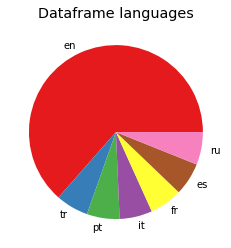

In [33]:
#seuil de toxic posts au sein du dataframe
load('pMulti2')
toxicPercentage=fractionPositive=pMulti2[pMulti2['toxic']>.5].shape[0] / pMulti2.shape[0]
p('toxicPercentage:',toxicPercentage)

i=unik(pMulti2['lang']).index
v=unik(pMulti2['lang']).values
n=len(v)
from matplotlib import cm
cs=cm.Set1(np.arange(n)/n)
fn='languages.png'
plt.title('Dataframe languages')
plt.pie(v, labels = i,colors=cs)
plt.cloase();#plt.savefig(fn);webp(fn);

fn='toxic.png'
plt.pie([toxicPercentage,1-toxicPercentage], labels = ['toxic', 'non toxic'])
plt.close();#plt.savefig(fn);webp(fn);

---
###1) Russian Cyrilic caracters ? 
- Are converted to phonetic latin :)
---

In [0]:
p(re.sub("[^a-zA-Z0-9',.!\?]+",' ', 'az-- Здравствуйте, меня зовут Бенджамин, я разработчик --az'))#Regex to keep cyrilic Caracters ?
load('pMulti2')
display(pMulti2[pMulti2['lang']=='ru']['comment_text'].values[:10])

array(["Net eto ne moe mnenie.Ispol'zuemyi istochnik na samom dele govorit . Vot eshche odin istochnik, kotoryi govorit Pochemu eto vazhno eto ne tak, esli vy rabotaete na traditsionnom PK ili Mac. Ia ne znaiu, naskol'ko eta funktsiia budet ispol'zovat'sia na traditsionnykh PK . Vy khotite dobavit' informatsiiu o neznachitel'nom izmenenii, kotoroe narushaet WP NOTGUIDE, WP NOTNEWS",
       'Da, seichas ia rabotaiu nad RFCU',
       "Prosto net dostatochnykh dokazatel'stv, chtoby peremestit' eto kuda libo eshche. Zagolovok veb saita gruppy i bol'shaia chast' ostal'noi chasti saita glasit , i eta kopiia Ink Disease s togo momenta, kogda gruppa fakticheski vse eshche byla vmeste govorit to zhe samoe. Mezhdu tem, ikh vypusk LP na Alternative Tentacles imeet tol'ko dva perioda M.I.A . Mezhdu tem dazhe R.E.M. ne vsegda zachisliaiutsia kak takovye sm. poslednii al'bom . Dlia vsekh, kto pridet na etot RFM, pozhaluista, prochitaite AFD Wikipedia Stat'i dlia udaleniia M.I.A. gruppa vtoraia nomin

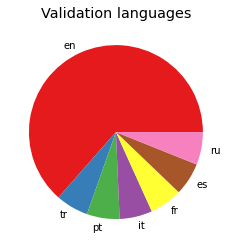

put : https://1.x24.fr/a/jupyter/poc7/validation-languages.webp?a=20200526-072432


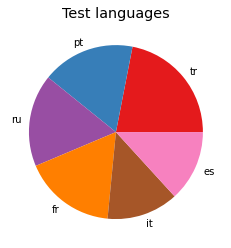

put : https://1.x24.fr/a/jupyter/poc7/test-languages.webp?a=20200526-072437


<Figure size 432x288 with 0 Axes>

In [32]:
load('pMulti2,testDf')
from matplotlib import cm
#p('validationdf',unik(pMulti2.loc[validationIndexes]['lang']))

i=unik(pMulti2['lang']).index
v=unik(pMulti2['lang']).values
n=len(v)

cs=cm.Set1(np.arange(n)/n)
fn='validation-languages.png'
plt.title('Validation languages')
plt.pie(v, labels = i,colors=cs)
plt.show();#plt.savefig(fn);webp(fn);

#p('testdf',unik(testDf['lang']))

i=unik(testDf['lang']).index
v=unik(testDf['lang']).values
n=len(v)

cs=cm.Set1(np.arange(n)/n)
fn='test-languages.png'
plt.title('Test languages')
plt.pie(v, labels = i,colors=cs)
plt.show();#plt.savefig(fn);webp(fn);

##F) Wordcounts

put : https://1.x24.fr/a/jupyter/poc7/wordcounts.webp?a=20200521-083100


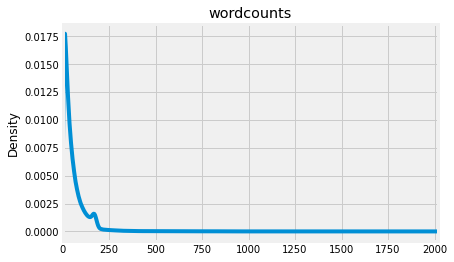

In [0]:
load('pMulti2')
def countwords(i):
  return len(re.findall(r'\w+', i)) 

wordcounts=[countwords(i) for i in pMulti2['comment_text'].values]
save('wordcounts')
kde(wordcounts,'wordcounts')
kde(wordcounts,'wordcounts','wordcounts.png',quantilex=.95)

 ---
 ## G) Traitement de textes
 ---

put : https://1.x24.fr/a/jupyter/poc7/plotmethode.score-roc.webp?a=20200526-072132


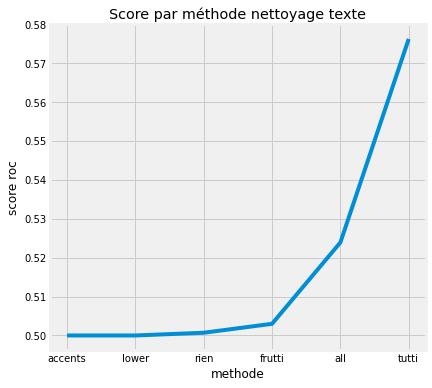

In [31]:
scores9 = {}
load('pMulti2,shorttrain,scores9')
if(not gke('shortrain')):
    from sklearn.utils import shuffle
    shorttrain = shuffle(pMulti2)[:30000]
    short_train_x = shorttrain['comment_text'].values
    short_train_y = shorttrain['toxic'].values.round().astype('bool')
    shorttest = shuffle(pMulti2)[10000:20000]
    short_test_x = shorttest['comment_text'].values
    short_test_y = shorttest['toxic'].values.round().astype('bool')
    save('shorttrain,short_train_x,short_train_y,shorttest,short_test_x,short_test_y')

trainx = short_train_x
testx = short_test_x

ml = 192
mdl = 'jplu/tf-xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(mdl)
#
combinaisons = {
    'rien': 1,
    'accents': 2,
    'lower': 3,
    'tutti': 17,
    'all': 9699690,
    'frutti': 5 *
    7 *
    11 *
    13 *
    17}
for i in combinaisons.keys():
    params = combinaisons[i]
    # reset
    model = getModel(i, mdl, ml)
    trainx = short_train_x
    testx = short_test_x
    # then ..
    trainx = [TraitementTexte(x, params) for x in trainx]
    encoded = regular_encode(trainx, tokenizer, maxlen=ml)
    splitsX = np.split(encoded, 5)
    splitsY = np.split(short_train_y, 5)
    j = 0
    for split in splitsX:
        model.fit(split, splitsY[j])
        j += 1
    testx = [TraitementTexte(x, params) for x in testx]
    encoded = regular_encode(testx, tokenizer, maxlen=ml)
    predictions = model.predict(encoded)
    roc = round(
        sklearn.metrics.roc_auc_score(
            short_test_y,
            predictions.round().astype('bool')),
        4)
    scores9[i] = roc
    p(i, roc)

save('scores9')
display(scores9)
plot(scores9, 'methode', 'score roc', title='Score par méthode nettoyage texte',sort='score roc')

#.--------------------------------------------------------------------

#1) Distillbert rounded

In [0]:
# bigger batch size possible avec rounding des predictions Toxic or Not, 4
# splits ok mais 10 mieux pour éviter que cela décroche entre 2 passes
mdlname = 'distil192'
mdl = 'distilbert-base-multilingual-cased'
ml = 192
Pkey = 'p77d3_MultiDistil192'
globals()[Pkey] = {}
globals()[Pkey + '_hist'] = []
load(Pkey + ',' + Pkey + '_hist')
encoded = 'pMulti2_encoded_multiDistil_192'  # encoded_multiDistil_192
load(encoded + ',pMulti2')
df = pMulti2
indexes = df.index.values
encodedTexts = globals()[encoded]
valDf = distillbert_validationFinaleCleaned
nbSplits = 5
bs = 8 * 128
roundIt = True
Pkey = 'p77d3_MultiDistil192_'
mdlname = 'distil192'
mdl = 'distilbert-base-multilingual-cased'
ml = 192
# x=Pkey+'_lastCheckpoint';load(x);lastCheckpoint=GG1(x);p(lastCheckpoint)
lastCheckpoint = 'p77d3_MultiDistil192_checkpoint0-3.h5'
x = 'p77d3_MultiDistil192_lastCheckpoint'
load(x)
if(gke(x)):
    lastCheckpoint = GG1(x)
    p('last checkpoint:', x)

model = getModel(mdlname, mdl, ml)
getFile(lastCheckpoint)
model.load_weights(lastCheckpoint)  # AdaDelta
trainLoop()  # much better scoring at training, mais cette donnée serait elle illusoire, serait - il mieux d'avoir un score d'entrainement plus faible, et des prédictions meilleures au final ??? :)
# saveOnFailure()

In [0]:
#roc_auc:0.9162388122342647

0.9162388122342647


---
#2) Distillbert floating fit with msle loss
- Obtient t-on des résultats auc supérieurs ? Non, de 0.92 à 0.88 sur leaderboard
---

In [0]:
acc2checkpoint = {}
load('acc2checkpoint')
Pkey = 'p77d3_MultiDistil192_msle_notRounded'
globals()[Pkey] = {}
globals()[Pkey + '_hist'] = []
# dernières versions si déjà modifiées précédemment
load(Pkey + ',' + Pkey + '_hist')
model = x = y = xv = yv = None
cc()
# getFile(lastCheckpoint);model.load_weights(lastCheckpoint)#AdaDelta
model = getModel(mdlname, mdl, ml, 'msle')
x = Pkey + '_lastCheckpoint'
load(x)
if(gke(x)):  # aka:resume training
    lastCheckpoint = GG1(x)
    p('last checkpoint:', x)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)

nbSplits = 5
bs = 8 * 52
roundIt = False  # 56 ok, cibler accuracy maximale
trainLoop()
# saveOnFailure()
# at the end of 1st skf loop : comparer ce qui est comparable
'''
histo.history
history.accuracy
#has multiple points to plot for :)

per batch accuracy history ?
accuracy de .77 au 70 ème batch de 8*52 valeurs :: soit 21000 rows suffisantes avant "affinage", 885 => stagne aux nuances, 1196:0.7949
Cela semble Croitre l'accuracy est plus faible quand les cibles sont continues (affines) et non discrètes
>Mais cela donne t-il des prédictions plus précises ??
'''
# at the end of 1st skf loop : comparer ce qui est comparable


h5   p77d3_MultiDistil192_msle_notRounded_checkpoint0-1.h5   True


---
#5) Bert
---

In [0]:
# 0.921 same submission score as distillbert
x = y = xv = yv = model = None
cc()  # del(x,y,xv,yv) accuracy:0.92 très rapidement ^_^
nbSplits = 5
bs = 8 * 40
roundIt = True
Pkey = 'p77d3_bert192_'
mdlname = 'bert192'
mdl = 'bert-base-multilingual-cased'
cp = 'p77d3_bert_cp'
ml = 192
val = 'bert_validationFinaleCleaned'
encoded = 'pMulti2_encoded_bert_192'  # is same as encoded_multiDistil_192

load(val + ',' + encoded + ',pMulti2')
df = pMulti2
indexes = df.index.values
encodedTexts = GG1(encoded)
valDf = GG1(val)

model = getModel(mdlname, mdl, ml)
load(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDelta

trainLoop()


In [0]:
saveOnFailure();#les données de history sont-elles serializées ?
p('auc/r2 train',auc(np.concatenate([x,xv]),np.concatenate([y,yv])))#
#x1=np.concatenate([x,xv]);p1=model.predict(x1);y1=np.concatenate([y,yv]);p(sum(p1),'/',sum(y1));p('auc/r2/f1 train+test',auc(x1,y1,p1))

---
#6) Xlm Roberta
---

---
##a) xml roberta 192
---

###0) Original Skf Training

In [0]:
x = y = xv = yv = model = None
cc()  # del(x,y,xv,yv
nbSplits = 5
bs = 8 * 20
roundIt = True
mdlname = 'xlmr192'
mdl = 'jplu/tf-xlm-roberta-base'
ml = 192
Pkey = 'p77d3_xlmr192_'
cp = Pkey + '_lastCheckpoint'  # genertaed
val = 'xmlRoberta_validationFinaleCleaned'
encoded = 'pMulti2_encoded_xlmroberta_192'  # encoded_multiDistil_192
load(val + ',' + encoded + ',pMulti2')
df = pMulti2
indexes = df.index.values
encodedTexts = GG1(encoded)
valDf = GG1(val)

model = getModel(mdlname, mdl, ml)
load(cp)
p(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint restoring weights:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDelta

x = GG1(Pkey + '_last')
if(x):
    departx, departy = x
p(departx, departy)
trainLoop()  # much better scoring at training, mais cette donnée serait elle illusoire, serait - il mieux d'avoir un score d'entrainement plus faible, et des prédictions meilleures au final ??? :)

saveOnFailure();
p('auc/r2 train',auc(np.concatenate([x,xv]),np.concatenate([y,yv])))#.99 c'est top top non ?

Resuming :  xmlRoberta_validationFinaleCleaned ,exists: False  or tgz: False
get:xmlRoberta_validationFinaleCleaned.tgz
files found: 1
list of files within tgz: ['xmlRoberta_validationFinaleCleaned.pickle']
Resuming :  pMulti2_encoded_xlmroberta_192 ,exists: False  or tgz: False
get:pMulti2_encoded_xlmroberta_192.tgz
files found: 1
list of files within tgz: ['pMulti2_encoded_xlmroberta_192.pickle']



Resuming :  p77d3_xlmr192__lastCheckpoint ,exists: False  or tgz: False
get:p77d3_xlmr192__lastCheckpoint.pickle
files found: 1
p77d3_xlmr192__lastCheckpoint
last checkpoint restoring weights: p77d3_xlmr192__lastCheckpoint
get:p77d3_xlmr192__checkpoint0-5.h5.zip
0 0
Resuming :  loss_2checkpoint ,exists: False  or tgz: False
get:loss_2checkpoint.pickle
files found: 1
Resuming :  acc2checkpoint ,exists: False  or tgz: False
get:acc2checkpoint.pickle
files found: 1
Resuming :  val_acc2checkpoint ,exists: False  or tgz: False
get:val_acc2checkpoint.pickle
files found: 1
Resuming :  p77d3_xlmr192_ ,exists: False  or tgz: False
get:p77d3_xlmr192_.pickle
files found: 1
Resuming :  p77d3_xlmr192__hist ,exists: False  or tgz: False
get:p77d3_xlmr192__hist.pickle
files found: 1
____________________________________________________________________________________________________________________________________________________________________________________
0:0,WARNING:tensorflow:Gradients do not

3601/3601 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9923
Epoch 00001: val_loss improved from inf to 0.02606, saving model to p77d3_xlmr192__checkpoint0-1.h5
3601/3601 [==============================] - 1307s 363ms/step - loss: 0.0202 - accuracy: 0.9923 - val_loss: 0.0261 - val_accuracy: 0.9904
pickle   p77d3_xlmr192__last.pickle   True
_
3601/3601 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9898
Epoch 00001: val_loss improved from inf to 0.02492, saving model to p77d3_xlmr192__checkpoint0-2.h5
3601/3601 [==============================] - 1272s 353ms/step - loss: 0.0262 - accuracy: 0.9898 - val_loss: 0.0249 - val_accuracy: 0.9904
pickle   p77d3_xlmr192__last.pickle   True
_
3601/3601 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9897
Epoch 00001: val_loss improved from inf to 0.02468, saving model to p77d3_xlmr192__checkpoint0-3.h5
3601/3601 [==============================] - 1273s 353ms/step - loss: 0.0

In [0]:
saveOnFailure();
p('auc/r2 train',auc(np.concatenate([x,xv]),np.concatenate([y,yv])))#.99 c'est top top non ? ( dernier fragment de train avec fragment validation issu du skf )

5602/5602 [==============================] - 471s 84ms/step
auc/r2 train (0.9927460496132561, 0.9820271279779995, 0)


---
###1) Resume 192 with Fast Training
---

In [0]:
x = y = xv = yv = model = None
cc()  # del(x,y,xv,yv
nbSplits = 5
bs = 8 * 20
roundIt = True
mdlname = 'xlmr192'
mdl = 'jplu/tf-xlm-roberta-base'
ml = 192
Pkey = 'p77d3_xlmr192_'
cp = Pkey + '_lastCheckpoint'  # genertaed
val = 'xmlRoberta_validationFinaleCleaned'
encoded = 'pMulti2_encoded_xlmroberta_192'  # encoded_multiDistil_192
load(val + ',' + encoded + ',pMulti2')
df = pMulti2
indexes = df.index.values
encodedTexts = GG1(encoded)
valDf = GG1(val)

model = getModel(mdlname, mdl, ml)
load(cp)
p(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint restoring weights:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDeltaz

history = LossHistory()
load(Pkey+'_fullHistory');
if(gke(Pkey+'_fullHistory')):
  x=GG1(Pkey+'_fullHistory')
  history = LossHistory(x)

iLoop = 0
while iLoop < 20:
    p('iLoop:', iLoop)  # aka "epochs"
    rdSeed = int(datetime.datetime.now().strftime("%y%m%d%H%M"))
    p('randomSeed', rdSeed)
    seed_everything(rdSeed)
    trainLoop2(skfSplits=30)
    p(iLoop, 'auc/r2 train', auc(x, y))
    #!rm *.h5 *.pickle *.zip *.tgz
    saveOnFailure()
    departx = departy = 0
    iLoop += 1

---
###2) scoring
---

In [0]:
saveOnFailure();
plot(history.accuracy,'trainstep','accuracy',fn=Pkey+'_trainaccuracy.png')
plot(history.losses,'trainstep','loss',fn=Pkey+'_trainloss.png')

load('pMulti2,bow_val')
xv=np.array(itemgetter(*bow_val)(encodedTexts))#,dtype='int64' allready
yv=pMulti2.loc[bow_val]['toxic'].values.round()
roc,r2,whut=auc(xv,yv)
p('roc for xlmRoberta:',roc)#0.82
scores8['xmlr192Fast']=roc
save('scores8')

---
###3) Full History XLMR192
---

In [0]:
#mdlname = Pkey = 'p77d4_xlmr192Fast_'# old one -- no validation score history : to resume later
mdlname = Pkey = 'p8_xlmr192FastAll_0'
#rm *.pickle *.tgz
deli('x,y,xv,yv,model')
cc()  # del(x,y,xv,yv,model)
roundIt = True
mdl = 'jplu/tf-xlm-roberta-base'
ml = 192
cpf = Pkey + '_lastCheckpoint'  # genertaed
val = 'xmlRoberta_validationFinaleCleaned'
encoded = 'pMulti2_encoded_xlmroberta_192'  # encoded_multiDistil_192
load(val + ',' + encoded + ',p2Index,roundedToxics')

encodedTexts = GG1(encoded)
valDf = GG1(val)
nbSplits = 5
bs = 8 * 20

model = getModel(mdlname, mdl, ml)
load(cpf)
if(gke(cpf)):
  lastCheckpoint = GG1(cpf)
  p('last checkpoint restoring weights:', cpf)
  getFile(lastCheckpoint)
  model.load_weights(lastCheckpoint)  # AdaDeltaz

history = LossHistory()
load(Pkey+'_fullHistory');
if(gke(Pkey+'_fullHistory')):
  x=GG1(Pkey+'_fullHistory')
  history = LossHistory(x)

iLoop = 0
#deli('p2Index');load('p2Index')

while iLoop < 20:
    rdSeed = int(datetime.datetime.now().strftime("%y%m%d%H%M"))
    p('iLoop:', iLoop,',randomSeed', rdSeed)
    seed_everything(rdSeed)
    #TODO : récupérer roc sur jeu validation à chaque step <== Pour bien généraliser
    trainLoop3(skfSplits=5)#does not save checkpoints anymore
    #!rm *.h5 *.pickle *.zip *.tgz
    departx = departy = 0
    iLoop += 1

---
####a) Lang, Roc, Scores
---

put : https://1.x24.fr/a/jupyter/poc7/plotp77d4_xlmr192Fast__trainaccuracy.webp?a=20200522-100936


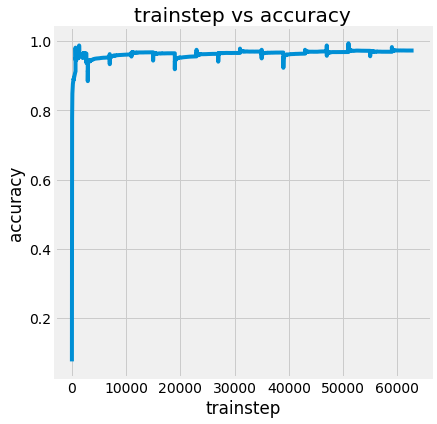

put : https://1.x24.fr/a/jupyter/poc7/plotp77d4_xlmr192Fast__trainloss.webp?a=20200522-100939


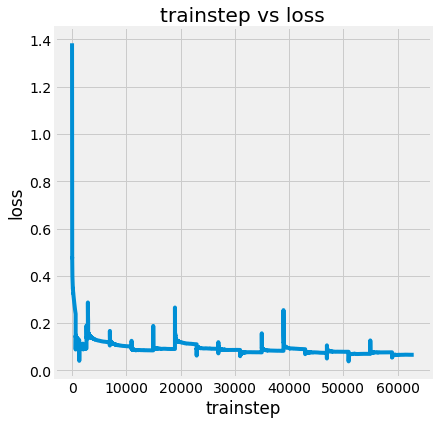

67/67 [==============================] - 12s 172ms/step
roc for xlmRoberta: 0.8935427630473503


NameError: ignored

In [0]:
# Save latest Train checkpoint
ftpls()
scores8['xmlr192FastAllLangs'] = lastroc


cpf = Pkey + '_checkpoint.last.h5'
model.save_weights(cpf)
ftpput(cpf)
SG1(cp, cpf)
save(cp)
p(cpf)

saveOnFailure()  # en cas d'interruption du calcul précédent
plot(
    history.accuracy,
    'trainstep',
    'accuracy',
    fn=Pkey +
    '_trainaccuracy.png',
    width=16)
plot(history.losses, 'trainstep', 'loss', fn=Pkey + '_trainloss.png', width=16)
'''
load('pMulti2,bow_val')
xv=np.array(itemgetter(*bow_val)(encodedTexts))#,dtype='int64' allready
yv=pMulti2.loc[bow_val]['toxic'].values.round()
roc,r2,whut=auc(xv,yv)
p('roc for xlmRoberta:',roc)#0.82
#load('scores8')
'''

xk = 'pMulti2_encoded_xlmroberta_192'
yk = 'roundedToxics'
load('langs2index1,' + xk + ',' + yk)

rocPerLangAndModel[Pkey] = {}

for lang in langs2index1.keys():
    langIndexs = langs2index1[lang]
    if(len(langIndexs) < 1):
        continue
    x = np.array(itemgetter(*langIndexs)(GG1(xk)))
    # a=time()
    testPred = model.predict(x, batch_size=bs)  # ,verbose=1
    # testPred=model.predict(x[:10])#,batch_size=8*10,verbose=1
    # p('time',time()-a)
    testPred = [i[0] for i in testPred]
    testPred2 = pd.DataFrame(testPred)
    testPred2.loc[testPred2[0] >= 0.5, 0] = True
    testPred2.loc[testPred2[0] < 0.5, 0] = False
    testPred3 = list(testPred2[0].values)
    y = np.array(itemgetter(*langIndexs)(GG1(yk)))
    rocAucScore = round(sklearn.metrics.roc_auc_score(testPred3, y), 4)
    # p(lang,len(langIndexs),'values',len(x),'=>',rocAucScore)
    rocPerLangAndModel[Pkey][lang] = rocAucScore

# Oui, le trim par regex du russe donne ?????

display(rocPerLangAndModel[Pkey])
plot(
    history.accuracy,
    'trainstep',
    'accuracy',
    fn=Pkey +
    '_trainaccuracy.png',
    width=16)
plot(history.losses, 'trainstep', 'loss', fn=Pkey + '_trainloss.png', width=16)
p('Model Lastroc', Pkey, lastroc)
scores8['xml192FastAll'] = lastroc  # 0.8845565872150444
save('rocPerLangAndModel,scores8,score11')


---
###4) Keep Accents
---

In [0]:
# 0.9357 => 0.85980451926711
mdlname = Pkey = 'p77G_xlmr192Fast_Accents'
encoded = 'pMulti3_encoded_xlmroberta_192'  # Pré-encoded values
val = 'vf3_pMulti3_encoded_xlmroberta_192'
mdl = 'jplu/tf-xlm-roberta-base'

deli('x,y,xv,yv,model')
cc()  # del(x,y,xv,yv,model)
roundIt = True
ml = 192
cpf = Pkey + '_lastCheckpoint.h5'  # genertaed
load(val + ',' + encoded)


encodedTexts = GG1(encoded)
valDf = GG1(val)
nbSplits = 5
bs = 8 * 20

model = getModel(mdlname, mdl, ml)
load(cpf)
p(cpf)
if(gke(cpf)):
    lastCheckpoint = GG1(cpf)
    p('last checkpoint restoring weights:', cpf)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDeltaz

history = LossHistory()
load(Pkey + '_fullHistory')
if(gke(Pkey + '_fullHistory')):
    x = GG1(Pkey + '_fullHistory')
    history = LossHistory(x)

iLoop = 0
# deli('p2Index');load('p2Index')

while iLoop < 20:
    rdSeed = int(datetime.datetime.now().strftime("%y%m%d%H%M"))
    p('iLoop:', iLoop, ',randomSeed', rdSeed)
    seed_everything(rdSeed)

    # TODO : récupérer roc sur jeu validation à chaque step <== Pour bien
    # généraliser
    trainLoopTr(skfSplits=5)  # does not save checkpoints anymore
    p(iLoop, 'auc/r2 train', auc(x, y))
    #!rm *.h5 *.pickle *.zip *.tgz
    departx = departy = 0
    iLoop += 1

    cpf = Pkey + '_lastCheckpoint.h5'
    model.save_weights(cpf)
    ftpput(cpf)
    SG1(cp, cpf)
    save(cp)
    p(cpf)


1145.88:=> 1145.88



p77F_NotEn_xlmr192Fast__lastCheckpoint.h5
iLoop: 0 ,randomSeed 2005240639
5 splits
0,WARNING:tensorflow:Gradients do not exist for variables ['tf_roberta_model/roberta/pooler/dense/kernel:0', 'tf_roberta_model/roberta/pooler/dense/bias:0'] when minimizing the loss.


655/655 [==============================] - 59s 89ms/step
0.85980451926711 -0.22155832400091424
_
399/399 [==============================] - 38s 96ms/step


KeyboardInterrupt: ignored

####B) save values

In [0]:
# Save latest Train checkpoint
cpf = Pkey + '_lastCheckpoint.h5'
model.save_weights(cpf)
ftpput(cpf)
SG1(cp, cpf)
save(cp)
p(cpf)

saveOnFailure()  # en cas d'interruption du calcul précédent
plot(
    history.accuracy,
    'trainstep',
    'accuracy',
    fn=Pkey +
    '_trainaccuracy.png',
    width=16)
plot(history.losses, 'trainstep', 'loss', fn=Pkey + '_trainloss.png', width=16)
scores8['xml192FastMultiNotEn'] = roc
save('scores8')


OSError: ignored

####C) Per lang score

In [0]:
% % script False
ftpls()
load('langs2index3')
for lang in langs2index3.keys():
    # itemgetter(*validationIndexesMulti3)(
    # intersection
    langs = langs2index3[lang]

langs
# roc per lang

x = itemgetter(*validationIndexesMulti3)(encodedTexts)
y = np.array(itemgetter(*validationIndexesMulti3)(roundedToxics3))

testPred = model.predict(x, batch_size=bs, verbose=1)
testPred2 = pd.DataFrame(testPred)
testPred2.loc[testPred2[0] >= 0.5, 0] = True
testPred2.loc[testPred2[0] < 0.5, 0] = False
testPred3 = [i[0] for i in list(testPred2.values)]
rocAucScore = sklearn.metrics.roc_auc_score(testPred3, ytest)

cm = confusion_matrix(ytrue, preds, labels)
fn2 = mdlName + 'cm' + fn + '.png'
cm_df = pd.DataFrame(cm, labels, labels)
plt.figure(figsize=(w, h))
sns.heatmap(cm_df, annot=True).get_figure().savefig(fn2, bbox_inches='tight')
webp(fn2)
plt.close()


---
###5) NotEn7
- Excluding En Language Data
- Train not using en text, is this sufficent ?
---

15985.23:model,=> 15985.27
p8_p2xlmr192Fast_NotEn7_lastCheckpoint.h5
iLoop: 0 ,randomSeed 2005250615
5 splits
0,WARNING:tensorflow:Gradients do not exist for variables ['tf_roberta_model/roberta/pooler/dense/kernel:0', 'tf_roberta_model/roberta/pooler/dense/bias:0'] when minimizing the loss.


229/229 [==============================] - 22s 95ms/step
0.8415682644745629 -0.05776458774580173
_
399/399 [==============================] - 38s 96ms/step
nothing to save ['p8_p2xlmr192Fast_NotEn7_lastCheckpoint']
229/229 [==============================] - 19s 81ms/step
0.8578247360490964 0.2732473436846252
_
399/399 [==============================] - 32s 81ms/step
nothing to save ['p8_p2xlmr192Fast_NotEn7_lastCheckpoint']
229/229 [==============================] - 19s 81ms/step
0.9159015117451939 0.0934292058014633
_
399/399 [==============================] - 33s 83ms/step
nothing to save ['p8_p2xlmr192Fast_NotEn7_lastCheckpoint']
229/229 [==============================] - 19s 81ms/step
0.8412423555280697 0.4766473397707621
_
399/399 [==============================] - 33s 82ms/step
nothing to save ['p8_p2xlmr192Fast_NotEn7_lastCheckpoint']
229/229 [==============================] - 19s 82ms/step
0.8941088705037239 0.463114663346165
_
399/399 [==============================] - 33s 82m

ERROR:paramiko.transport:Socket exception: Connection reset by peer (104)


OSError: ignored

In [38]:
#

iLoop: 3 ,randomSeed 2005250914
5 splits
0,WARNING:tensorflow:Gradients do not exist for variables ['tf_roberta_model/roberta/pooler/dense/kernel:0', 'tf_roberta_model/roberta/pooler/dense/bias:0'] when minimizing the loss.


229/229 [==============================] - 18s 80ms/step
0.9050121016026674 0.6804399952858685
_
229/229 [==============================] - 18s 81ms/step
0.920197380836872 0.7006313177600507
_
229/229 [==============================] - 19s 81ms/step
0.9158556074358754 0.4978933941551177
_
229/229 [==============================] - 19s 82ms/step
0.8870279688425273 0.4746970373657218
_
229/229 [==============================] - 19s 82ms/step
0.8965932398470782 0.23726187876121063
_
3875/3875 [==============================] - 247s 64ms/step
3 auc/r2 train (0.876773445788564, 0.45730679025031273, 0)
p8_p2xlmr192Fast_NotEn7_lastCheckpoint.h5
iLoop: 4 ,randomSeed 2005251055
5 splits
229/229 [==============================] - 19s 81ms/step
0.9190701919282782 0.7193208644034603
_
229/229 [==============================] - 19s 81ms/step
0.931762777262594 0.7602424259229184
_
229/229 [==============================] - 19s 81ms/step
0.93136243430081 0.5945424665738839
_
229/229 [================

KeyboardInterrupt: ignored

In [43]:
#

iLoop: 7 ,randomSeed 2005251338
5 splits
229/229 [==============================] - 19s 82ms/step
0.9410491615570202 0.7804446550698197
_
229/229 [==============================] - 19s 82ms/step
0.9444215260297988 0.7817910828770237
_
229/229 [==============================] - 19s 83ms/step
0.9492672516933054 0.651068665200266
_
399/399 [==============================] - 33s 83ms/step
aborting ..
3875/3875 [==============================] - 253s 65ms/step
7 auc/r2 train (0.9154049462401759, 0.654235807352521, 0)


FileNotFoundError: ignored

p8_p2xlmr192Fast_NotEn7_lastCheckpoint.h5
Model Lastroc p8_p2xlmr192Fast_NotEn7 0.9432050896979735
Last Score for  p8_p2xlmr192Fast_NotEn7 0.9432050896979735


{'es': 0.9532,
 'fr': 0.9591,
 'it': 0.9596,
 'pt': 0.9529,
 'ru': 0.9123,
 'tr': 0.9229}

put : https://1.x24.fr/a/jupyter/poc7/plotlangue.score-roc.webp?a=20200525-133717


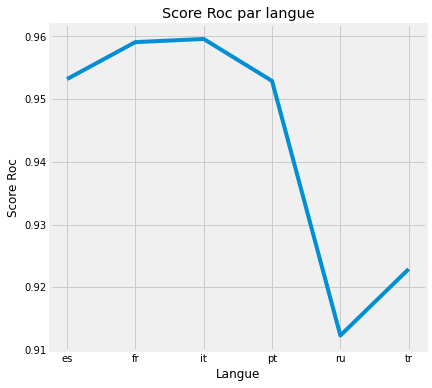

put : https://1.x24.fr/a/jupyter/poc7/plotp8_p2xlmr192Fast_NotEn7_trainaccuracy.webp?a=20200525-133720


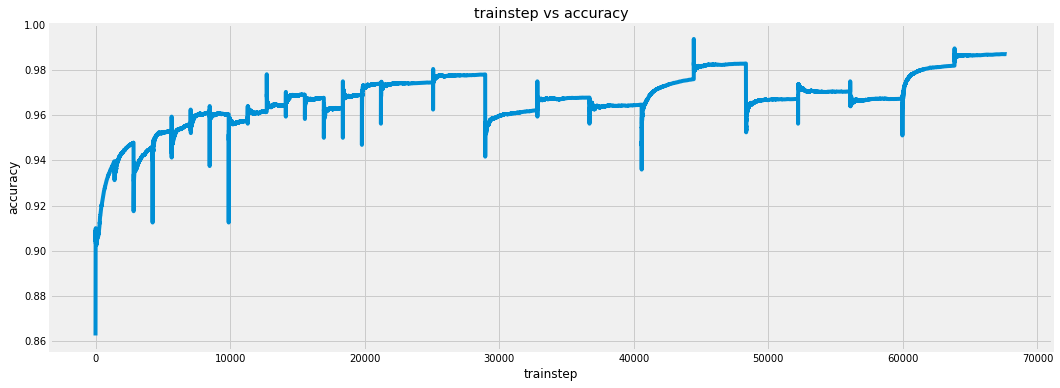

put : https://1.x24.fr/a/jupyter/poc7/plotp8_p2xlmr192Fast_NotEn7_trainloss.webp?a=20200525-133723


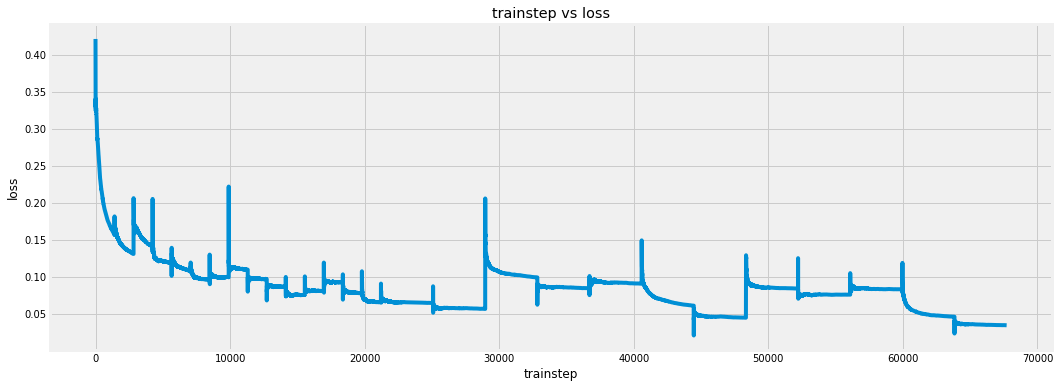

1

{'es': 0.9141,
 'fr': 0.9232,
 'it': 0.9334,
 'pt': 0.9269,
 'ru': 0.9204,
 'tr': 0.9269}

Model Lastroc p8_p2xlmr192Fast_NotEn7 0.9240054583194514
put : https://1.x24.fr/a/jupyter/poc7/plotp8_p2xlmr192Fast_NotEn7_trainaccuracy.webp?a=20200525-084408


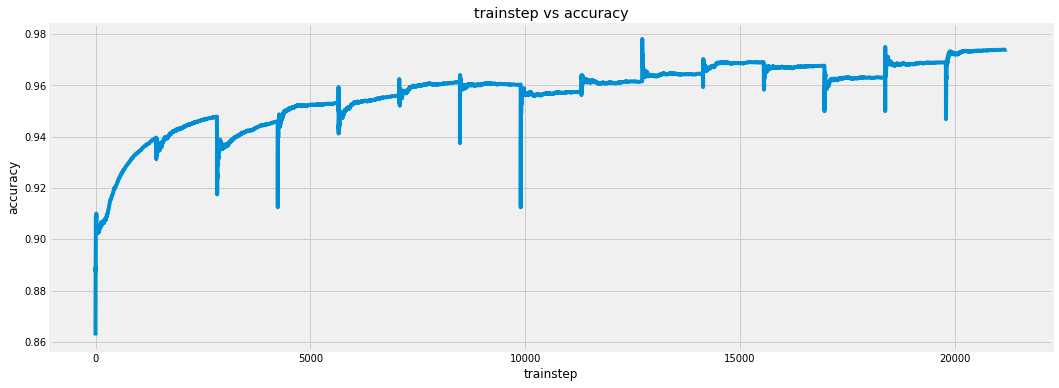

put : https://1.x24.fr/a/jupyter/poc7/plotp8_p2xlmr192Fast_NotEn7_trainloss.webp?a=20200525-084411


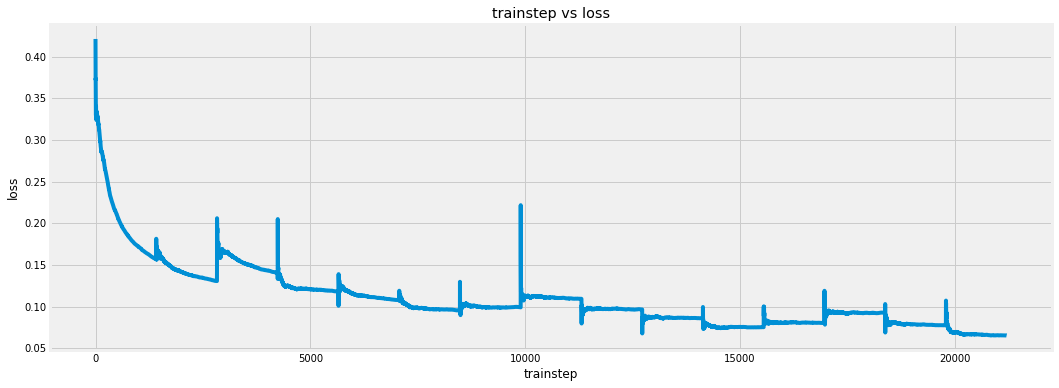

1

p8_p2xlmr192Fast_NotEn7_lastCheckpoint.h5
Model Lastroc p8_p2xlmr192Fast_NotEn7 0.9492672516933054
Last Score for  p8_p2xlmr192Fast_NotEn7 0.9492672516933054
rm: cannot remove 'scores8*': No such file or directory
rm: cannot remove 'rocPerLang*': No such file or directory
13882.79:scores8,rocPerLangAndModel,=> 13882.79


{'es': 0.9522,
 'fr': 0.9518,
 'it': 0.9549,
 'pt': 0.9542,
 'ru': 0.9478,
 'tr': 0.935}

put : https://1.x24.fr/a/jupyter/poc7/plotlangue.score-roc.webp?a=20200525-144723


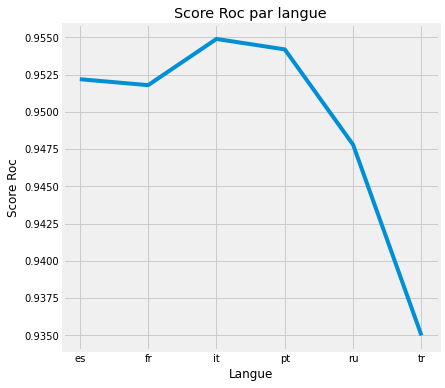

put : https://1.x24.fr/a/jupyter/poc7/plotp8_p2xlmr192Fast_NotEn7_trainaccuracy.webp?a=20200525-144726


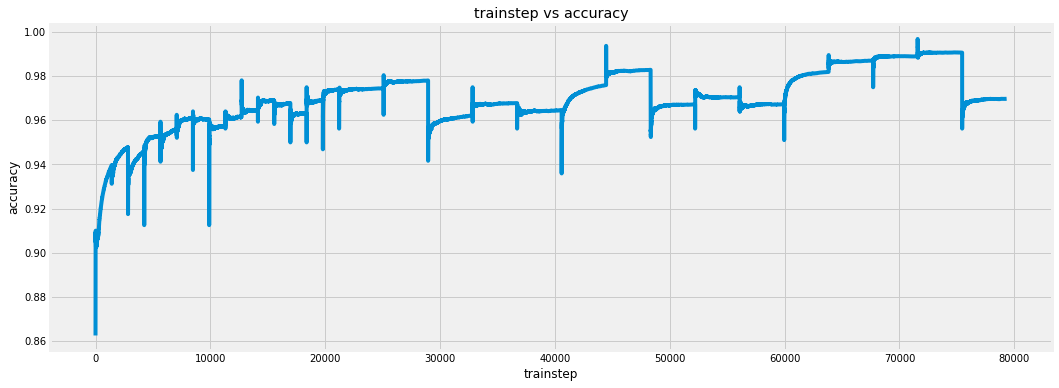

put : https://1.x24.fr/a/jupyter/poc7/plotp8_p2xlmr192Fast_NotEn7_trainloss.webp?a=20200525-144730


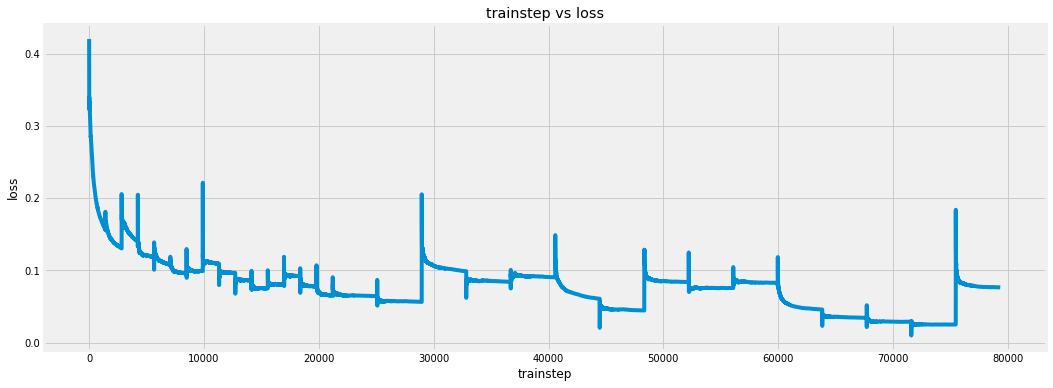

1

In [46]:
#

10064.03:=> 10064.07



p8_p2xlmr192Fast_NotEn7_lastCheckpoint
last checkpoint restoring weights: p8_p2xlmr192Fast_NotEn7_lastCheckpoint
resume history
iLoop: 0 ,randomSeed 2005251507
5 splits
0,WARNING:tensorflow:Gradients do not exist for variables ['tf_roberta_model/roberta/pooler/dense/kernel:0', 'tf_roberta_model/roberta/pooler/dense/bias:0'] when minimizing the loss.


229/229 [==============================] - 22s 96ms/step
0.9436568971781518 0.7894212762559858
_
229/229 [==============================] - 18s 81ms/step
0.928656508462056 0.7875813423317204
_
229/229 [==============================] - 19s 82ms/step
0.9469736680287957 0.7948017347616887
_
229/229 [==============================] - 19s 81ms/step
0.942855568054924 0.8000744865447679
_
229/229 [==============================] - 18s 81ms/step
0.9615396147388231 0.7563645435512226
_
1414/1414 [==============================] - 116s 82ms/step
0 auc/r2 train (0.9973273627379952, 0.9899304473512811, 0)
p8_p2xlmr192Fast_NotEn7_lastCheckpoint.h5
iLoop: 1 ,randomSeed 2005251559
5 splits
229/229 [==============================] - 19s 82ms/step
0.9624306893768009 0.7701597837306543
_
229/229 [==============================] - 19s 82ms/step
0.9432393310897985 0.8008118783096038
_
229/229 [==============================] - 19s 82ms/step
0.9478075222578887 0.8019660717783352
_
229/229 [===============

ERROR:paramiko.transport:Socket exception: Connection reset by peer (104)


OSError: ignored

In [0]:
#

iLoop: 2 ,randomSeed 2005251703
5 splits
229/229 [==============================] - 19s 82ms/step
0.9410016130116862 0.8081368091264023
_
229/229 [==============================] - 19s 82ms/step
0.9509064620052626 0.8048472424647768
_
229/229 [==============================] - 19s 83ms/step
0.9323315316400823 0.8068004567637291
_
229/229 [==============================] - 19s 82ms/step
0.9465180372929091 0.8127596485577782
_
229/229 [==============================] - 19s 82ms/step
0.9468758833148495 0.8043664576269869
_
1414/1414 [==============================] - 117s 83ms/step
2 auc/r2 train (0.9972772634876104, 0.9946280055609886, 0)
p8_p2xlmr192Fast_NotEn7_lastCheckpoint.h5
iLoop: 3 ,randomSeed 2005251752
5 splits
229/229 [==============================] - 19s 81ms/step
0.9489109690709158 0.8075849826146204
_
229/229 [==============================] - 19s 82ms/step
0.9424349015100472 0.8071787116567974
_
229/229 [==============================] - 19s 83ms/step
0.9382911828958432 0.

---
#### A) Last Results
---

In [5]:
mdlname = Pkey = 'p8_p2xlmr192Fast_NotEn7'

a = 'validationIndexesMulti'
b = 'pMulti2_encoded_xlmroberta_192'
d = 'roundedToxicsMulti2'
e = 'xmlRoberta_validationFinaleCleaned'
indexF = 'p2IndexMulti'
load(a + ',' + b + ',' + e + ',' + d)
assert(isinstance(roundedToxicsMulti2, dict))
diff = list(set(GG1(a)) - set(GG1(d)))
assert(len(diff) == 0)
# load('pMulti2');roundedToxicsMulti2=dict(pMulti2['toxic'].round().astype('bool'));save('roundedToxicsMulti2')
#diff=list(set(GG1(a)) - set(GG1(b)) )
# assert(len(diff)==0)
itemgetter(*validationIndexesMulti)(pMulti2_encoded_xlmroberta_192)
# itemgetter(*validationIndexesMulti)(roundedToxicsMulti2)
# end assertions
cpf = Pkey + '_lastCheckpoint.h5'  # genertaed
cp = Pkey + '_lastCheckpoint'
mdl = 'jplu/tf-xlm-roberta-base'
deli('x,y,xv,yv,model')
val = 'xmlRoberta_validationFinaleCleaned'
load(val)
valDf = GG1(val)
cc()  # del(x,y,xv,yv,model)
roundIt = True
ml = 192

nbSplits = 5
bs = 8 * 20

model = getModel(mdlname, mdl, ml)
load(cp)
p(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint restoring weights:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDeltaz

history = LossHistory()
load(Pkey + '_fullHistory')
if(gke(Pkey + '_fullHistory')):
    p('resume history')
    x = GG1(Pkey + '_fullHistory')
    history = LossHistory(x)

c = 0
iLoop = 0
# deli('p2Index');load('p2Index')
while iLoop < 20:
    rdSeed = int(datetime.datetime.now().strftime("%y%m%d%H%M"))
    p('iLoop:', iLoop, ',randomSeed', rdSeed)
    seed_everything(rdSeed)

    # TODO : récupérer roc sur jeu validation à chaque step <== Pour bien
    # généraliser
    trainLoopTr(
        skfSplits=5,
        index=indexF,
        val=a,
        toxics=d,
        encodedTexts=b,
        submissionDf=e)

    p(iLoop, 'auc/r2 train', auc(x, y))
    #!rm *.h5 *.pickle *.zip *.tgz
    departx = departy = 0
    iLoop += 1

    cpf = Pkey + '_lastCheckpoint.h5'
    model.save_weights(cpf)
    ftpput(cpf)
    SG1(cp, cpf)
    save(cp)
    p(cpf)
    if abort:
        break


10064.33:=> 10064.39



p8_p2xlmr192Fast_NotEn7_lastCheckpoint
last checkpoint restoring weights: p8_p2xlmr192Fast_NotEn7_lastCheckpoint
resume history


Last Score for  p8_p2xlmr192Fast_NotEn7 0.954194638904901


{'es': 0.9685,
 'fr': 0.9713,
 'it': 0.9757,
 'pt': 0.9734,
 'ru': 0.9347,
 'tr': 0.9319}

put : https://1.x24.fr/a/jupyter/poc7/plotlangue.score-roc.webp?a=20200526-070910


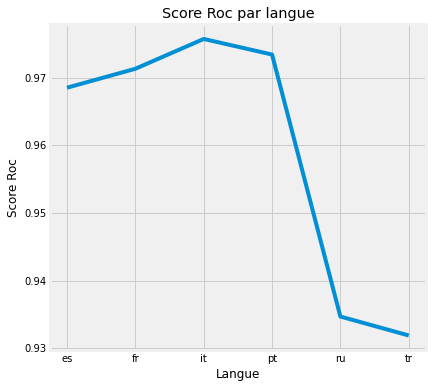

put : https://1.x24.fr/a/jupyter/poc7/plotp8_p2xlmr192Fast_NotEn7_trainaccuracy.webp?a=20200526-070913


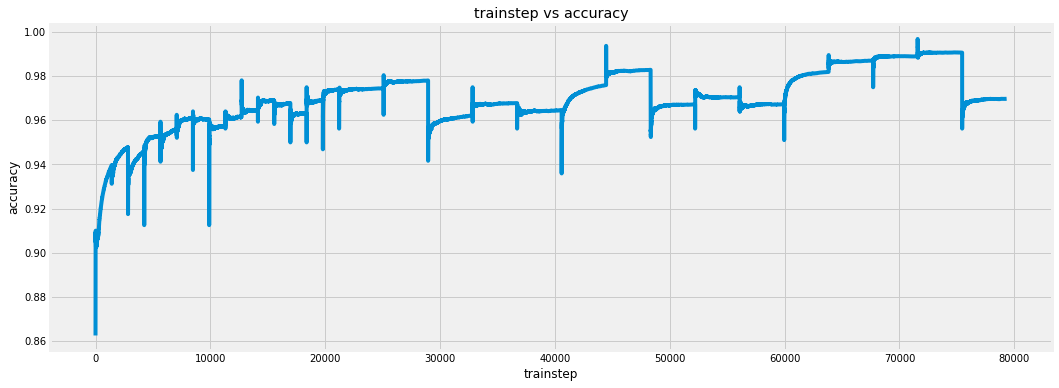

put : https://1.x24.fr/a/jupyter/poc7/plotp8_p2xlmr192Fast_NotEn7_trainloss.webp?a=20200526-070916


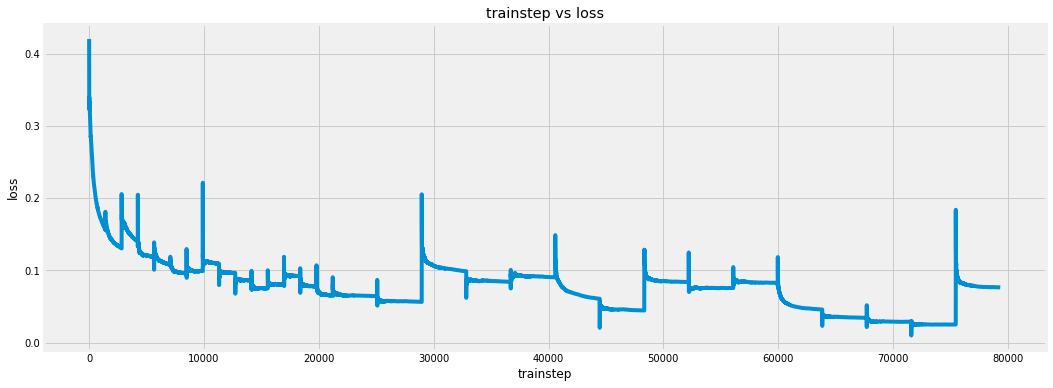

1

In [18]:
# Save latest Train checkpoint??
if True:
    saveOnFailure()  # en cas d'interruption du calcul précédent
    cpf = Pkey + '_lastCheckpoint.h5'
    model.save_weights(cpf)
    ftpput(cpf)
    SG1(cp, cpf)
    save(cp)
    p(cpf)


xk = 'pMulti2_encoded_xlmroberta_192'
yk = 'roundedToxicsMulti2'
load(Pkey + '_validAuc,langs2index2,' + xk + ',' + yk)

!rm score * rocPerLang*
ftpls()
score11 = {}
deli('scores8,score11,rocPerLangAndModel')
load('scores8,score11,rocPerLangAndModel')
scores8[Pkey] = GG1(Pkey + '_validAuc')[-1]
score11[Pkey] = GG1(Pkey + '_validAuc')[-1]
rocPerLangAndModel[Pkey] = {}

p('Last Score for ', Pkey, GG1(Pkey + '_validAuc')[-1])

for lang in langs2index2.keys():
    langIndexs = langs2index2[lang]
    if(len(langIndexs) < 1):
        continue
    x = np.array(itemgetter(*langIndexs)(GG1(xk)))
    # a=time()
    testPred = model.predict(x, batch_size=bs)  # ,verbose=1
    # testPred=model.predict(x[:10])#,batch_size=8*10,verbose=1
    # p('time',time()-a)
    testPred = [i[0] for i in testPred]
    testPred2 = pd.DataFrame(testPred)
    testPred2.loc[testPred2[0] >= 0.5, 0] = True
    testPred2.loc[testPred2[0] < 0.5, 0] = False
    testPred3 = list(testPred2[0].values)
    y = np.array(itemgetter(*langIndexs)(GG1(yk)))
    rocAucScore = round(sklearn.metrics.roc_auc_score(testPred3, y), 4)
    # p(lang,len(langIndexs),'values',len(x),'=>',rocAucScore)
    rocPerLangAndModel[Pkey][lang] = rocAucScore

# Oui, le trim par regex du russe donne ?????

display(rocPerLangAndModel[Pkey])
plot(rocPerLangAndModel[Pkey], 'Langue', 'Score Roc',
     title='Score Roc par langue', sort='Score Roc')

plot(
    history.accuracy,
    'trainstep',
    'accuracy',
    fn=Pkey +
    '_trainaccuracy.png',
    width=16)
plot(history.losses, 'trainstep', 'loss', fn=Pkey + '_trainloss.png', width=16)
save('rocPerLangAndModel,scores8,score11')
# >> Last Score for  p8_p2xlmr192Fast_NotEn7 0.9240054583194514pl


put : https://1.x24.fr/a/jupyter/poc7/plotlangue.score-roc.webp?a=20200526-071447


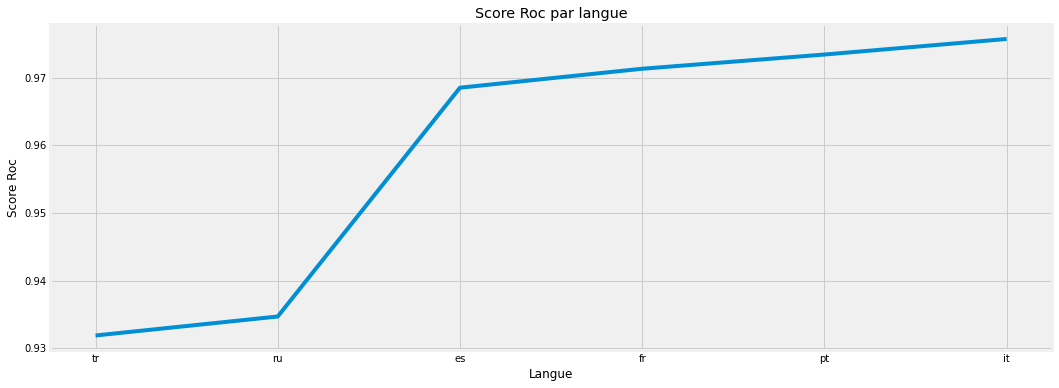

put : https://1.x24.fr/a/jupyter/poc7/plotmodel.score.webp?a=20200526-071450


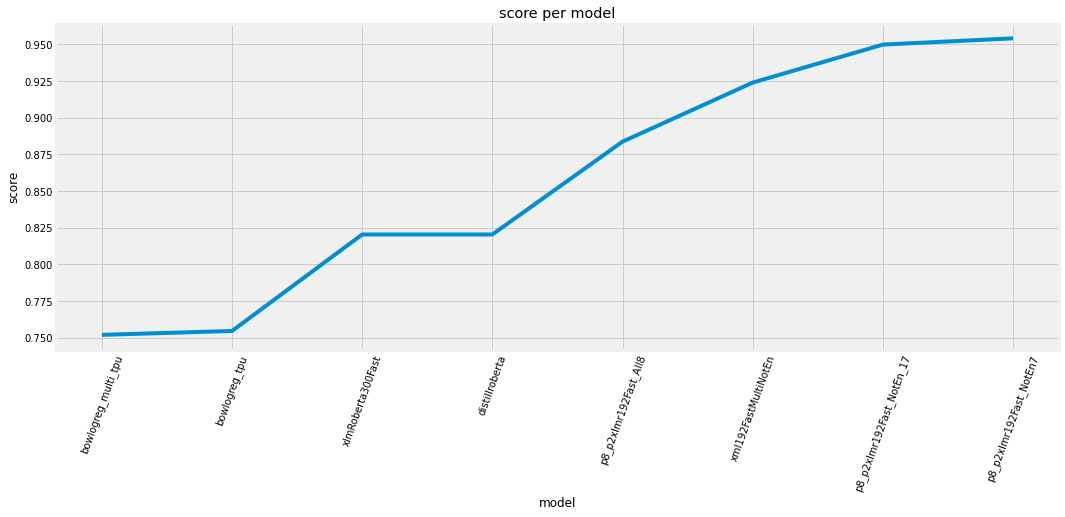

In [29]:
plot(rocPerLangAndModel[Pkey],'Langue','Score Roc',title='Score Roc par langue',sort='Score Roc',width=16)
plot(scores8,'model','score',rotate=70,title='score per model',sort='score',width=16)

---
###6) NotEn 17~ > another notebook
- P8_06_NotEn_17.ipynb
---

---
###7) Toutes langues,17 > another notebook : 
- P8_05_p8k_xlmroberta_all_langs__17.ipynb
---

---
##b) XlmRoberta ml:300
---

In [0]:
ftpls()
x = y = xv = yv = model = None
deli('pMulti2_encoded_xlmroberta_192')
cc()  # del(x,y,xv,yv
nbSplits = 5
bs = 8 * 10
roundIt = True
ml = 300
mdlname = 'xlmr300'
mdl = 'jplu/tf-xlm-roberta-base'
Pkey = 'p77d3_xlmr_300_'
cp = Pkey + '_lastCheckpoint'  # genertaed
# xmlRoberta_validationFinaleCleaned'#300 ????
val = 'vf_pMulti2_encoded_xlmroberta_300'
encoded = 'pMulti2_encoded_xlmroberta_300'  # encoded_multiDistil_192
load(val + ',' + encoded + ',pMulti2')
df = pMulti2
indexes = df.index.values
encodedTexts = GG1(encoded)
valDf = GG1(val)

model = getModel(mdlname, mdl, ml)
load(cp)
p(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint restoring weights:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDelta

load(Pkey + '_last')
# très important de le charger avant sinon départ à 0:0 à nouveau
x = GG1(Pkey + '_last')
if(x):
    p('departxy', x)
    departx, departy = x
# departx=3
lastLoss = 999999
trainLoop()


Resuming :  loss_2checkpoint ,exists: True  or tgz: False
files found: 1
Resuming :  acc2checkpoint ,exists: True  or tgz: False
files found: 1
Resuming :  val_acc2checkpoint ,exists: True  or tgz: False
files found: 1
Resuming :  p77d3_xlmr_300_ ,exists: True  or tgz: True
files found: 2
Resuming :  p77d3_xlmr_300__hist ,exists: True  or tgz: False
files found: 1
fold 0 < 3
fold 1 < 3
fold 2 < 3
____________________________________________________________________________________________________________________________________________________________________________________
7202/7202 [==============================] - ETA: 0s - accuracy: 0.9793 - loss: 0.0521
Epoch 00001: val_loss improved from inf to 0.04346, saving model to p77d3_xlmr_300__checkpoint3-1.h5
7202/7202 [==============================] - 2337s 325ms/step - accuracy: 0.9793 - loss: 0.0521 - val_accuracy: 0.9826 - val_loss: 0.0435
pickle   p77d3_xlmr_300__last.pickle   True
_
7202/7202 [==============================] - ET

In [0]:
saveOnFailure();#les données de history sont-elles serializées ?
p('auc/r2 train',auc(np.concatenate([x,xv]),np.concatenate([y,yv])))#
#x1=np.concatenate([x,xv]);p1=model.predict(x1);y1=np.concatenate([y,yv]);p(sum(p1),'/',sum(y1));p('auc/r2/f1 train+test',auc(x1,y1,p1))

---
###1) FastLoop - no skf, no validation
---

In [0]:
ftpls()
load('pMulti2')
x = y = xv = yv = model = None
cc()
ml = 300
mdlname = 'xlmr300_fast'
mdl = 'jplu/tf-xlm-roberta-base'
Pkey = 'p77d4_xlmr_300fast_'
cp = Pkey + '_lastCheckpoint'  # genertaed
val = 'vf_pMulti2_encoded_xlmroberta_300'
encoded = 'pMulti2_encoded_xlmroberta_300'
load(val + ',' + encoded + ',pMulti2')



encodedTexts = GG1(encoded)
valDf = GG1(val)
model = getModel(mdlname, mdl, ml)
nbSplits = 5
roundIt = True
#
history = LossHistory()
load(Pkey+'_fullHistory');
if(gke(Pkey+'_fullHistory')):
  x=GG1(Pkey+'_fullHistory')
  history = LossHistory(x)

bs = 8 * 10
lastLoss = 99999

load(cp)
p(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint restoring weights:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDeltaz

iLoop = 0
while iLoop < 10:
    p('iLoop:', iLoop)  # aka "epochs"
    rdSeed = int(datetime.datetime.now().strftime("%y%m%d%H%M"))
    p('randomSeed', rdSeed)
    seed_everything(rdSeed)

    trainLoop3(skfSplits=5)
    p(iLoop, 'auc/r2 train', auc(x, y))
    #!rm *.h5 *.pickle *.zip *.tgz
    saveOnFailure()
    departx = departy = 0
    iLoop += 1

###2) bow compare

put : https://1.x24.fr/a/jupyter/poc7/plotp77d4_xlmr_300fast__trainaccuracy.webp?a=20200521-164732


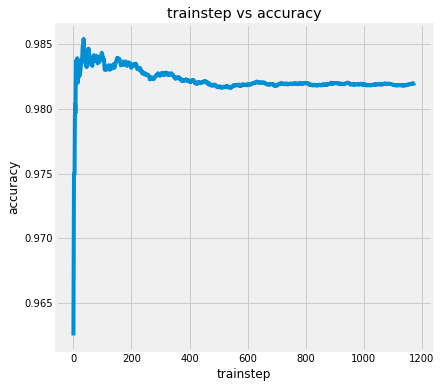

put : https://1.x24.fr/a/jupyter/poc7/plotp77d4_xlmr_300fast__trainloss.webp?a=20200521-164735


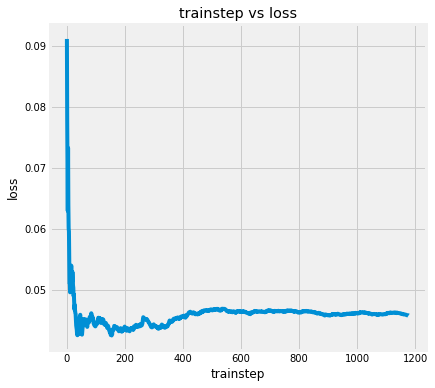

134/134 [==============================] - 14s 108ms/step
roc for xlmRoberta: 0.89676151863253


NameError: ignored

In [0]:
plot(history.accuracy,'trainstep','accuracy',fn=Pkey+'_trainaccuracy.png')
plot(history.losses,'trainstep','loss',fn=Pkey+'_trainloss.png')

load('pMulti2,bow_val')
xv=np.array(itemgetter(*bow_val)(encodedTexts))#,dtype='int64' allready
yv=pMulti2.loc[bow_val]['toxic'].values.round()
roc,r2,whut=auc(xv,yv)
p('roc for xlmRoberta:',roc)#0.82
scores8['xlmRoberta300Fast']=roc
save('scores8')

---
##C) XLMR Large Freezed with dense 32
---

In [0]:
ftpls()
load('pMulti2')
x = y = xv = yv = model = None
cc()
ml = 300
mdlname = 'xlmr300_fast'
mdl = 'jplu/tf-xlm-roberta-large'
Pkey = 'p77e4_xlmr_300Large_'
cp = Pkey + '_lastCheckpoint'  # genertaed
val = 'vf_pMulti2_encoded_xlmroberta_300'
encoded = 'pMulti2_encoded_xlmroberta_300'
load(val + ',' + encoded + ',pMulti2')
df = pMulti2
indexes = df.index.values
encodedTexts = GG1(encoded)
valDf = GG1(val)
nbSplits = 5
roundIt = True
if model is None:
    model = getModel(
        mdlname,
        mdl,
        ml,
        dense=32,
        freeze=transformers.modeling_tf_roberta.TFRobertaModel)
# freeze model layer
# model.summary()

history = LossHistory()
load(Pkey+'_fullHistory');
if(gke(Pkey+'_fullHistory')):
  x=GG1(Pkey+'_fullHistory')
  history = LossHistory(x)
lastLoss = 99999

load(cp)
p(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint restoring weights:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDeltaz

bs = 8 * 20
splits = 20
iLoop = 0
while iLoop < 10:
    rdSeed = int(datetime.datetime.now().strftime("%y%m%d%H%M"))
    # chaque itération: présenter les données dans un autre ordre
    p('iLoop:', iLoop, 'randomSeed:', rdSeed)
    seed_everything(rdSeed)
    np.random.shuffle(indexes)
    trainLoop2(skfSplits=splits)
    p(iLoop, 'auc/r2 train', auc(x, y))
    !rm * .h5 * .pickle * .zip * .tgz
    saveOnFailure()
    departx = departy = 0
    iLoop += 1


get:pMulti2.tgz
list of files within tgz: ['pMulti2.pickle']
get:vf_pMulti2_encoded_xlmroberta_300.tgz
list of files within tgz: ['vf_pMulti2_encoded_xlmroberta_300.pickle']
get:pMulti2_encoded_xlmroberta_300.tgz
list of files within tgz: ['pMulti2_encoded_xlmroberta_300.pickle']



<transformers.modeling_tf_roberta.TFRobertaModel object at 0x7efd00d277f0> not trainable
get:p77e4_xlmr_300Large__lastCheckpoint.pickle
p77e4_xlmr_300Large__lastCheckpoint
last checkpoint restoring weights: p77e4_xlmr_300Large__lastCheckpoint
get:p77e4_xlmr_300Large__checkpoint0_12.h5.zip
iLoop: 0 randomSeed: 2005210756
get:loss_2checkpoint.pickle
get:acc2checkpoint.pickle
get:val_acc2checkpoint.pickle
get:p77e4_xlmr_300Large_.pickle
get:p77e4_xlmr_300Large_.tgz
get:p77e4_xlmr_300Large__hist.pickle
20 splits
1001/1001 [==============================] - 413s 413ms/step - accuracy: 0.9253 - loss: 0.2614
0.2614315450191498 < 99999
_
 534/1001 [===============>..............] - ETA: 3:07 - accuracy: 0.9256 - loss: 0.2611

KeyboardInterrupt: ignored

In [0]:
#frozen is less accuratr

randomSeed 2005201608
iLoop: 0
20 splits
667/667 [==============================] - 405s 607ms/step - accuracy: 0.9248 - loss: 0.2977
0.29766371846199036 < 99999
_
667/667 [==============================] - 388s 581ms/step - accuracy: 0.9252 - loss: 0.2679
0.2679274380207062 < 0.29766371846199036
_
667/667 [==============================] - 388s 582ms/step - accuracy: 0.9254 - loss: 0.2648
0.26476922631263733 < 0.2679274380207062


FileNotFoundError: ignored

In [0]:
'''
Buffered data was truncated after reaching the output size limit.

import multiprocessing
memGraph=[]
def multip():
  global memGraph
  a=time()
  #mmhh we're the output gone ??
  trainLoop2(skfSplits=30)
  print('training step took:',round(time()-a),'seconds')
  mem_usage = memory_usage()
  memGraph+=mem_usage
  p(mem_usage[0])

while iLoop<10:
  p('iLoop:',iLoop)#aka "epochs"
  pr = multiprocessing.Process(target=multip)#,args=(skfSplits=30,)
  pr.start()
  pr.join()
  p('multiprocessing joined (done)')
  !rm *.h5 *.pickle *.zip *.tgz
  departx=departy=0
  iLoop+=1  
  saveOnFailure();
#training model ram is freed then
'''
#

iLoop: 0
30 splits
0,1 < 8
1,2 < 8
2,3 < 8
3,4 < 8
4,5 < 8
5,6 < 8
6,7 < 8


KeyboardInterrupt: ignored

In [0]:
df.loc[splits[0]]

,index,comment_text,toxic,lang,f
2537698,1223341,"'When you think about it, what clothing isn't ...",0.0,en,jigsaw-unintended-bias-train.csv
366018,195402,"Note . He, merci pour la note de l'article Ila...",0.0,fr,jigsaw-toxic-comment-train-google-fr-cleaned.csv
2159793,837567,Read what is actually going on . you wont have...,0.0,en,jigsaw-unintended-bias-train.csv
958898,206513,Editar resumo por CTF83! Alt editar . Eu chego...,0.0,pt,jigsaw-toxic-comment-train-google-pt-cleaned.csv
669783,99919,Vy ne mozhete izmenit' kartu seichas. On byl z...,0.0,ru,jigsaw-toxic-comment-train-google-ru-cleaned.csv
...,...,...,...,...,...
2818992,1511259,"That's the way to do it Unifor, stop productio...",0.0,en,jigsaw-unintended-bias-train.csv
2291715,972267,"The PQ gov't might start an inquiry, but the f...",0.0,en,jigsaw-unintended-bias-train.csv
434311,55865,Kapattiginiz bir SPI hakkinda daha fazla incel...,0.0,tr,jigsaw-toxic-comment-train-google-tr-cleaned.csv
2200745,879383,Threat to mankind.LOL!!!.Little OTT there friend,0.2,en,jigsaw-unintended-bias-train.csv


In [0]:
!rm *.h5 *.pickle *.zip *.tgz
saveOnFailure();#toutes les données de fin de loop : history sont-elles serializées ?
p('auc/r2 train',auc(np.concatenate([x]),np.concatenate([y])))#comparer sur le dernier split :)

In [0]:
%%script False
#departx=4;lastloss=0.1155
!rm *.h5 *.pickle *.zip *.tgz
trainLoop2()
saveOnFailure();#toutes les données de fin de loop : history sont-elles serializées ?
p('auc/r2 train',auc(np.concatenate([x]),np.concatenate([y])))#comparer sur le dernier split :)

rm: cannot remove '*.h5': No such file or directory
rm: cannot remove '*.tgz': No such file or directory
Resuming :  loss_2checkpoint ,exists: False  or tgz: False
get:loss_2checkpoint.pickle
files found: 1
Resuming :  acc2checkpoint ,exists: False  or tgz: False
get:acc2checkpoint.pickle
files found: 1
Resuming :  val_acc2checkpoint ,exists: False  or tgz: False
get:val_acc2checkpoint.pickle
files found: 1
Resuming :  p77d3_xlmr_300fast_ ,exists: False  or tgz: False
get:p77d3_xlmr_300fast_.tgz
files found: 1
list of files within tgz: ['p77d3_xlmr_300fast_.pickle']
Resuming :  p77d3_xlmr_300fast__hist ,exists: False  or tgz: False
get:p77d3_xlmr_300fast__hist.pickle
files found: 1
50 splits
0,1 < 50
1,2 < 50
2,3 < 50
3,4 < 50
4,5 < 50
5,6 < 50
6,7 < 50
7,8 < 50
8,9 < 50
9,10 < 50
10,11 < 50
11,12 < 50
12,13 < 50
13,14 < 50
14,15 < 50
15,16 < 50
16,17 < 50
17,18 < 50
18,19 < 50
19,20 < 50
20,21 < 50
21,22 < 50
22,23 < 50
23,24 < 50
24,25 < 50
25,26 < 50
26,27 < 50
27,28 < 50
28,29 < 50

---
##D) xlmr large simple
- slow to train
- sensé avoir plus de précision, mais la reduction du batch size handicape l'apprentissage
- consomme plus de ram donc réduction consécutive du batchsize
---

In [0]:
ftpls()
load('pMulti2')
x = y = xv = yv = model = None
cc()
# distilroberta
ml = 300
Pkey = mdlname = 'P8b_xlmr_300LargeFast_'
cp = Pkey + '_lastCheckpoint'
mdl = 'roberta-large'  # genertaed#jplu/tf-xlm-roberta-large
val = 'vf_pMulti2_encoded_xlmroberta_300'
encoded = 'pMulti2_encoded_xlmroberta_300'
load(val + ',' + encoded + ',pMulti2')
df = pMulti2
indexes = df.index.values
encodedTexts = GG1(encoded)
valDf = GG1(val)
nbSplits = 5
roundIt = True
# if model==None:
model = getModel(mdlname, mdl, ml)  # dense,freeze
# freeze model layer
# model.summary()

history = LossHistory()
load(Pkey+'_fullHistory');
if(gke(Pkey+'_fullHistory')):
  x=GG1(Pkey+'_fullHistory')
  history = LossHistory(x)
lastLoss = 99999

load(cp)
p(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint restoring weights:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDeltaz
# Reinit Kernel on TPU Ram exceeded
# xlm Large :: needs more splits in order not to fill the tpu ram ==>
# Réduire le batch size
bs = 8 * 5
iLoop = 0
# accuracy de 0.91 très rapidement, isoler history asap
while iLoop < 10:
    rdSeed = int(datetime.datetime.now().strftime("%y%m%d%H%M"))
    # chaque itération: présenter les données dans un autre ordre
    p('iLoop:', iLoop, 'randomSeed:', rdSeed)
    seed_everything(rdSeed)
    np.random.shuffle(indexes)
    trainLoop2(skfSplits=nbSplits)
    p(iLoop, 'auc/r2 train', auc(x, y))
    !rm * .h5 * .pickle * .zip * .tgz
    saveOnFailure()
    departx = departy = 0
    iLoop += 1

saveOnFailure()
plot(history.accuracy, 'trainstep', 'accuracy', fn=Pkey + '_trainaccuracy.png')
plot(history.losses, 'trainstep', 'loss', fn=Pkey + '_trainloss.png')


iLoop: 1 randomSeed: 2005211127
5 splits
 1509/16004 [=>............................] - ETA: 1:42:04 - accuracy: 0.9241 - loss: 0.2696

KeyboardInterrupt: ignored

put : https://1.x24.fr/a/jupyter/poc7/plotP8b_xlmr_300LargeFast__trainaccuracy.webp?a=20200521-113823


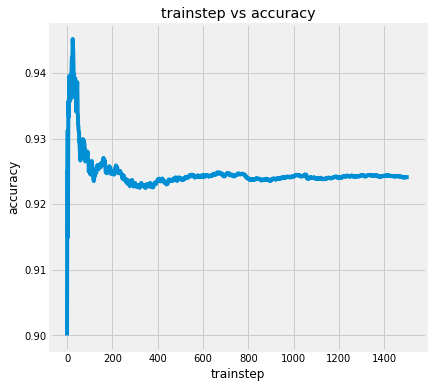

put : https://1.x24.fr/a/jupyter/poc7/plotP8b_xlmr_300LargeFast__trainloss.webp?a=20200521-113827


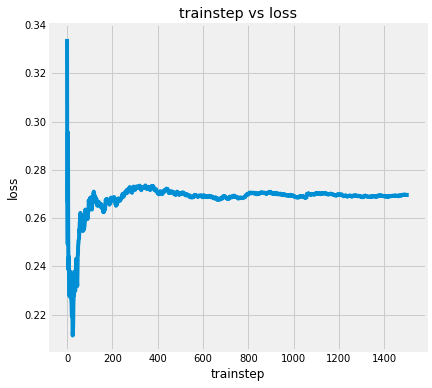

In [0]:
#

---
##E) distillroberta 192
- Submission: 0.80 bof bof
---

In [0]:
ftpls()
load('pMulti2')
deli('x,y,xv,yv,model')
cc()
ml = 192
Pkey = mdlname = 'P8b_DistillRoberta_192_Fast_'
cp = Pkey + '_lastCheckpoint'
mdl = 'distilroberta-base'  # mrm8488/distilroberta-base-finetuned-sentiment
val = 'vf_pMulti2_encoded_multiDistil_192'
encoded = 'pMulti2_encoded_multiDistil_192'
load(val + ',' + encoded + ',p2index,roundedToxics')


encodedTexts = GG1(encoded)
valDf = GG1(val)
roundIt = True
model = getModel(mdlname, mdl, ml)

history = LossHistory()
load(Pkey+'_fullHistory');
if(gke(Pkey+'_fullHistory')):
  x=GG1(Pkey+'_fullHistory')
  history = LossHistory(x)
lastLoss = 99999

load(cp)
p(cp)
if(gke(cp)):
    lastCheckpoint = GG1(cp)
    p('last checkpoint restoring weights:', cp)
    getFile(lastCheckpoint)
    model.load_weights(lastCheckpoint)  # AdaDeltaz

bs = 8 * 128  # Reduce until not oom
# Better Use more splits, faster transitions, more checkpoints, more
# predictions ..
nbSplits = 10
iLoop = 0
while iLoop < 10:
    rdSeed = int(datetime.datetime.now().strftime("%y%m%d%H%M"))
    # chaque itération: présenter les données dans un autre ordre
    p('iLoop:', iLoop, 'randomSeed:', rdSeed)
    seed_everything(rdSeed)
    np.random.shuffle(indexes)
    trainLoop3(skfSplits=nbSplits)
    p(iLoop, 'auc/r2 train', auc(x, y))
    #!rm *.h5 *.pickle *.zip *.tgz
    saveOnFailure()
    departx = departy = 0
    iLoop += 1

saveOnFailure()
plot(history.accuracy, 'trainstep', 'accuracy', fn=Pkey + '_trainaccuracy.png')
plot(history.losses, 'trainstep', 'loss', fn=Pkey + '_trainloss.png')
# exploit Results as :: P8b_DistillRoberta_192_Fast_


iLoop: 0 randomSeed: 2005211448
10 splits
0,1 < 10
1,2 < 10
2,3 < 10
3,4 < 10
4,5 < 10
5,6 < 10
6,7 < 10
7,8 < 10
8,9 < 10
313/313 [==============================] - 247s 790ms/step - accuracy: 0.9491 - loss: 0.1440
0.14400634169578552 < 999999
_
313/313 [==============================] - 72s 231ms/step
0 auc/r2 train (0.8492405092891941, 0.05617885761656016, 0)
iLoop: 1 randomSeed: 2005211457
10 splits
313/313 [==============================] - 247s 789ms/step - accuracy: 0.9496 - loss: 0.1424
0.14240632951259613 < 999999
_
313/313 [==============================] - 247s 791ms/step - accuracy: 0.9506 - loss: 0.1404
0.140394926071167 < 0.14240632951259613
_
313/313 [==============================] - 248s 791ms/step - accuracy: 0.9497 - loss: 0.1412
_
313/313 [==============================] - 248s 791ms/step - accuracy: 0.9499 - loss: 0.1414
_
313/313 [==============================] - 248s 792ms/step - accuracy: 0.9503 - loss: 0.1395
0.1395368129014969 < 0.140394926071167
_
313/313 [=

KeyboardInterrupt: ignored

---
###1) Compare with Bow
---

In [0]:
plot(history.accuracy,'trainstep','accuracy',fn=Pkey+'_trainaccuracy.png')
plot(history.losses,'trainstep','loss',fn=Pkey+'_trainloss.png')

load('pMulti2,bow_val')
xv=np.array(itemgetter(*bow_val)(encodedTexts))#,dtype='int64' allready
yv=pMulti2.loc[bow_val]['toxic'].values.round()
roc,r2,whut=auc(xv,yv)
p('roc for distillroberta:',roc)#0.82
scores8['xlmRoberta300Fast']=roc
save('scores8')

11/11 [==============================] - 2s 200ms/step
roc for distillroberta 0.8204177350939723


---
##F) DistillRoberta Sentiment Finetuned
- model not found ???
---

In [0]:
%%script False
#model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-base-finetuned-sentiment")
ftpls();load('pMulti2')
deli('x,y,xv,yv,model');cc();
ml=192;Pkey=mdlname='P8b_DistillRoberta_192_Fast_';cp=Pkey+'_lastCheckpoint';mdl='mrm8488/distilroberta-base-finetuned-sentiment';#
val='vf_pMulti2_encoded_multiDistil_192';encoded='pMulti2_encoded_multiDistil_192';load(val+','+encoded+',pMulti2')
df=pMulti2;indexes=df.index.values;encodedTexts=GG1(encoded);valDf=GG1(val);
nbSplits=5;roundIt=True 
model=getModel(mdlname,mdl,ml);

history = LossHistory()
load(Pkey+'_fullHistory');
if(gke(Pkey+'_fullHistory')):
  x=GG1(Pkey+'_fullHistory')
  history = LossHistory(x)
lastLoss=99999

load(cp);p(cp)
if(gke(cp)):
  lastCheckpoint=GG1(cp);p('last checkpoint restoring weights:',cp)
  getFile(lastCheckpoint);model.load_weights(lastCheckpoint)#AdaDeltaz

nbSplits=5
bs=8*128
iLoop=0
while iLoop<10:
  rdSeed=int(datetime.datetime.now().strftime("%y%m%d%H%M"))
  #chaque itération: présenter les données dans un autre ordre
  p('iLoop:',iLoop,'randomSeed:',rdSeed)
  seed_everything(rdSeed)
  np.random.shuffle(indexes)
  trainLoop2(skfSplits=nbSplits)
  p(iLoop,'auc/r2 train',auc(x,y))
  !rm *.h5 *.pickle *.zip *.tgz
  saveOnFailure();
  departx=departy=0
  iLoop+=1  

saveOnFailure()
plot(history.accuracy,'trainstep','accuracy',fn=Pkey+'_trainaccuracy.png')
plot(history.losses,'trainstep','loss',fn=Pkey+'_trainloss.png')

TypeError: ignored

---
#7) Xlnet  - incompactibilité tensorflow / Tpu
---

In [0]:
%%script False
'''
UnimplementedError: {{function_node __inference_train_function_330486}} Compilation failure: Asked to propagate a dynamic dimension from hlo transpose.30474@{}@2 to hlo %all-reduce.30479 = f32[768,12,64]{0,2,1} all-reduce(f32[768,12,64]{0,2,1} %transpose.30474), replica_groups={{0,1,2,3,4,5,6,7}}, to_apply=%sum.30475, metadata={op_type="CrossReplicaSum" op_name="CrossReplicaSum_3"}, which is not implemented.
	TPU compilation failed
	 [[{{node tpu_compile_succeeded_assert/_1838722734771323167/_5}}]]
'''
x=y=xv=yv=model=None;cc();#del(x,y,xv,yv

nbSplits=5;bs=8*5;roundIt=True;#10 but tensorflow error ?

val='xlnet_validationFinaleCleaned'
encoded='pMulti2_encoded_xlnet_192'#encoded_multiDistil_192
load(val+','+encoded+',pMulti2')
df=pMulti2
indexes=df.index.values
encodedTexts=GG1(encoded)
valDf=GG1(val)

Pkey='p77d3_xlnet192_'
mdlname='xlnet192';mdl='xlnet-base-cased';ml=192
model=getModel(mdlname,mdl,ml);
cp='p77d3_xlnet_cp';load(cp);
if(gke(cp)):
  lastCheckpoint=GG1(cp);p('last checkpoint:',cp)
  getFile(lastCheckpoint);model.load_weights(lastCheckpoint)
trainLoop()
#saveOnFailure()#with batch/batch history

Resuming :  xlnet_validationFinaleCleaned ,exists: False  or tgz: False
get:xlnet_validationFinaleCleaned.tgz
files found: 1
list of files within tgz: ['xlnet_validationFinaleCleaned.pickle']
Resuming :  pMulti2_encoded_xlnet_192 ,exists: False  or tgz: False
get:pMulti2_encoded_xlnet_192.tgz
files found: 1
list of files within tgz: ['pMulti2_encoded_xlnet_192.pickle']



Resuming :  p77d3_xlnet_cp ,exists: False  or tgz: False
files found: 0
Resuming :  acc2checkpoint ,exists: False  or tgz: False
files found: 0
Resuming :  p77d3_xlnet192_ ,exists: False  or tgz: False
files found: 0
Resuming :  p77d3_xlnet192__hist ,exists: False  or tgz: False
files found: 0
____________________________________________________________________________________________________________________________________________________________________________________
0:0,WARNING:tensorflow:Gradients do not exist for variables ['tfxl_net_model/transformer/mask_emb:0', 'tfxl_net_model/transformer/layer_._0/rel_attn/r_s_bias:0', 'tfxl_net_model/transformer/layer_._0/rel_attn/seg_embed:0', 'tfxl_net_model/transformer/layer_._1/rel_attn/r_s_bias:0', 'tfxl_net_model/transformer/layer_._1/rel_attn/seg_embed:0', 'tfxl_net_model/transformer/layer_._2/rel_attn/r_s_bias:0', 'tfxl_net_model/transformer/layer_._2/rel_attn/seg_embed:0', 'tfxl_net_model/transformer/layer_._3/rel_attn/r_s_bias:0'

UnimplementedError: ignored

In [0]:
saveOnFailure();#les données de history sont-elles serializées ?
p('auc/r2 train',auc(np.concatenate([x,xv]),np.concatenate([y,yv])))#
#x1=np.concatenate([x,xv]);p1=model.predict(x1);y1=np.concatenate([y,yv]);p(sum(p1),'/',sum(y1));p('auc/r2/f1 train+test',auc(x1,y1,p1))

h5   p77d3_xlnet192__checkpoint0-1.h5   False
!!!! p77d3_xlnet192__checkpoint0-1.h5  not exists


AssertionError: ignored

---
#8) Conclusions
---

In [41]:
display(scores8)

{'bowlogreg_multi_tpu': 0.7519676569399453,
 'bowlogreg_tpu': 0.7546100948102936,
 'distillroberta': 0.8204177350939723,
 'p8_p2xlmr192Fast_NotEn7': 0.9432050896979735,
 'xlmRoberta300Fast': 0.8204177350939723,
 'xml192FastMultiNotEn': 0.9240054583194514}

#.--------------------------------------------------------------------

#Essais / Sandbox

#.--------------------------------------------------------------------

---
##9) GPU Cuda fp16 Apex / Ktrain Learner
---

In [0]:
#os.system('pip install fast-bert;git clone https://github.com/NVIDIA/apex;cd apex;pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./;rm -rf apex');        
#*https://github.com/kaushaltrivedi/fast-bert
#DistilRoberta- mrm8488/distilroberta-base-finetuned-sentiment
if True:
  from fast_bert.data_cls import BertDataBunch
  from fast_bert.learner_cls import BertLearner
  from fast_bert.metrics import accuracy
  import logging,torch

#train.csv=index,text,label={0,1}

mgpu=False
#l'étendue du databunch fait la taille du chargement en ram
nBunches=200
frac=list(range(0,200))
load('pMulti2')
globalDf5=pMulti2
globalDf5['comment_text,toxic'.split(',')].to_csv('p76Ktrain.csv')#aka tout puis voilà
globalDf5[(globalDf5['tt']=='test') & (globalDf5['b'].isin([0,1]))]['comment_text,toxic'.split(',')].to_csv('p76Kval.csv')

#*}{relaucnh
#mdlt='distilroberta';mdl='mrm8488/distilroberta-base-finetuned-sentiment'#bert-base-uncased'
mdlt='bert';mdl='bert-base-uncased';outputdir='p76k3-bert';#plantga etoute ram
#mdlt='xlnet';mdl='xlnet-large-cased';outputdir='p76k3-bert';
mdlt='distilroberta';mdl='distilbert-base-multilingual-cased'
fn=outputdir+'.csv'
os.system('rm -rf '+outputdir+';mkdir '+outputdir)

if 'databunch':
  deli('databunch,learner,globalDf5')  
  databunch = BertDataBunch('./', './',
                            tokenizer=mdl,
                            train_file='p76Ktrain.csv',
                            val_file='p76Kval.csv',
                            label_file='p76Klabels.csv',
                            text_col='comment_text',
                            label_col='toxic',
                            batch_size_per_gpu=16,#************
                            max_seq_length=192,#512
                            multi_gpu=mgpu,
                            multi_label=False,
                            model_type=mdlt)
  
  logger = logging.getLogger()
  device_cuda = torch.device('cuda')
  metrics = [{'name': 'accuracy', 'function': accuracy}]

#learner is not fit
if'learner':
  learner = BertLearner.from_pretrained_model(
              databunch,
              pretrained_path=mdl,
              metrics=metrics,
              device=device_cuda,
              logger=logger,
              output_dir=outputdir,
              finetuned_wgts_path=None,
              warmup_steps=500,
              multi_gpu=mgpu,
              is_fp16=True,
              multi_label=False,
              logging_steps=50)

cm=learner.fit(epochs=2,
			lr=6e-5,
			validate=False, 	# Evaluate the model after each batch then epoch
			schedule_type='warmup_cosine',
			optimizer_type='lamb')

learner.save_model()
os.system('tar czf '+outputdir+'.tgz '+outputdir);ftpput(outputdir+'.tgz')
#***
#texts = [extractionMots3('Fuck you mother fucker die'),'this movie is not worth watching'];predictions = learner.predict_batch(texts);p(predictions)

load('validationFinaleCleaned')#distillbert_validationFinaleCleaned ( extractionMots3)
globals()[Pkey+'_learnerPredictions'] = learner.predict_batch(validationFinaleCleaned)
save(Pkey+'_learnerPredictions')


In [0]:
message('TPU failure, TPU failure, test new parameters please')

---
##7) Xlnet.bin
---

In [0]:
defaultDevice='cuda'

###a) torch install

In [0]:
VERSION = "20200325"  #@param ["1.5" , "20200325", "nightly"]
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version $VERSION

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3727  100  3727    0     0  47782      0 --:--:-- --:--:-- --:--:-- 47782
Updating TPU and VM. This may take around 2 minutes.
Updating TPU runtime to pytorch-dev20200325 ...
Uninstalling torch-1.5.0a0+d6149a7:
  Successfully uninstalled torch-1.5.0a0+d6149a7
Uninstalling torchvision-0.6.0a0+3c254fb:
  Successfully uninstalled torchvision-0.6.0a0+3c254fb
Copying gs://tpu-pytorch/wheels/torch-nightly+20200325-cp36-cp36m-linux_x86_64.whl...
/ [1 files][ 83.4 MiB/ 83.4 MiB]                                                
Operation completed over 1 objects/83.4 MiB.                                     
Copying gs://tpu-pytorch/wheels/torch_xla-nightly+20200325-cp36-cp36m-linux_x86_64.whl...
- [1 files][114.5 MiB/114.5 MiB]                                                
Operation completed over 1 objects/114.5 MiB.               

###b) fun

In [0]:
#!pip install torch_xla
# imports pytorch
nLabels=1
nTorchLin=768 #768
xlnetmdl='xlnet-large-cased'

import torch
import torch_xla
import torch_xla.core.xla_model as xm
defaultDevice=dev = xm.xla_device()

!pip install transformers
import transformers
#torch device = tpu

#nTorchLin=768 #self.classifier = torch.nn.Linear(nTorchLin) ne doit pas différer !

if'xlnet.bin transformers functions':
  #generate_predictions(model,pd.DataFrame({'a':test['body'].values}), len(mlbTrain.classes_), device=defaultDevice, batch_size=32,xtest=test['body'].values)
  def generate_predictions(model, df, num_labels, device=defaultDevice, batch_size=32, xtest=[]):    
    global num_iter,x1
    num_iter = math.ceil(df.shape[0]/batch_size)
    p('nIterations for evaluation',num_iter)
    pred_probs = np.array([]).reshape(0, num_labels)
    model.to(device)
    model.eval()
    for i in range(num_iter):    
      if len(xtest)==0:
        df_subset = df.iloc[i*batch_size:(i+1)*batch_size,:]
        X = df_subset["features"].values.tolist()
        masks = df_subset["masks"].values.tolist()
        X = torch.tensor(X)
        masks = torch.tensor(masks, dtype=torch.long)
        X = X.to(device)
        masks = masks.to(device)
      else:
        p(i,end=',')
        x1 = xtest[i*batch_size:(i+1)*batch_size]
        x1 = tokenize_inputs(x1,tokenizer)
        X = torch.tensor(x1)
        masks = create_attn_masks(x1)      
        masks = torch.tensor(masks, dtype=torch.long)
        X = X.to(device)
        masks = masks.to(device)      
      with torch.no_grad():
        logits = model(input_ids=X, attention_mask=masks)
        logits = logits.sigmoid().detach().cpu().numpy()
        pred_probs = np.vstack([pred_probs, logits])
    #endfor
    return pred_probs

  def plot_sentence_embeddings_length(text_list, tokenizer):
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t), text_list))
    tokenized_texts_len = list(map(lambda t: len(t), tokenized_texts))
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.hist(tokenized_texts_len, bins=40);
    ax.set_xlabel("Length of Comment Embeddings");
    ax.set_ylabel("Number of Comments");
    return

  def tokenize_inputs(text_list, tokenizer, num_embeddings=512):
    """
    Tokenizes the input text input into ids. Appends the appropriate special
    characters to the end of the text to denote end of sentence. Truncate or pad
    the appropriate sequence length.
    """
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t)[:num_embeddings-2], text_list))
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    input_ids = [tokenizer.build_inputs_with_special_tokens(x) for x in input_ids]
    input_ids = pad_sequences(input_ids, maxlen=num_embeddings, dtype="long", truncating="post", padding="post")
    return input_ids

  def create_attn_masks(input_ids):
    """
    Create attention masks to tell model whether attention should be applied to
    the input id tokens. Do not want to perform attention on padding tokens.
    """
    # Create attention masks
    attention_masks = []

    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)
    return attention_masks
  
  import os
  import math
  import torch
  from torch.nn import BCEWithLogitsLoss
  from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
  from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
  from keras.preprocessing.sequence import pad_sequences
  from sklearn.model_selection import train_test_split
  import numpy as np
  import pandas as pd
  from tqdm import tqdm, trange
  import matplotlib.pyplot as plt
  %matplotlib inline
  from transformers import XLNetTokenizer
  tokenizer = XLNetTokenizer.from_pretrained(xlnetmdl, do_lower_case=True)  
if'That Malicious Model Class':
#XLNetForRegression
  class XLNetForMultiLabelSequenceClassification(torch.nn.Module):
    def __init__(self, num_labels=nLabels, nTorchLin=nTorchLin):
      super(XLNetForMultiLabelSequenceClassification, self).__init__()
      self.num_labels = num_labels
      self.xlnet = XLNetModel.from_pretrained(xlnetmdl)
      self.classifier = torch.nn.Linear(nTorchLin, num_labels)
      torch.nn.init.xavier_normal_(self.classifier.weight)

    def forward(self, input_ids, token_type_ids=None,attention_mask=None, labels=None):
      # last hidden layer
      last_hidden_state = self.xlnet(input_ids=input_ids,\
                                    attention_mask=attention_mask,\
                                    token_type_ids=token_type_ids)
      # pool the outputs into a mean vector
      mean_last_hidden_state = self.pool_hidden_state(last_hidden_state)
      logits = self.classifier(mean_last_hidden_state)
          
      if labels is not None:
        loss_fct = BCEWithLogitsLoss()
        loss = loss_fct(logits.view(-1, self.num_labels),\
                        labels.view(-1, self.num_labels))
        return loss
      else:
        return logits
      
    def freeze_xlnet_decoder(self):
      """
      Freeze XLNet weight parameters. They will not be updated during training.
      """
      for param in self.xlnet.parameters():
        param.requires_grad = False
      
    def unfreeze_xlnet_decoder(self):
      """
      Unfreeze XLNet weight parameters. They will be updated during training.
      """
      for param in self.xlnet.parameters():
        param.requires_grad = True
      
    def pool_hidden_state(self, last_hidden_state):
      """
      Pool the output vectors into a single mean vector 
      """
      last_hidden_state = last_hidden_state[0]
      mean_last_hidden_state = torch.mean(last_hidden_state, 1)
      return mean_last_hidden_state

if'save/load model':
  def save_model(model, save_path, epochs, lowest_eval_loss, train_loss_hist, valid_loss_hist):
    """
    Save the model to the path directory provided
    """
    #model.model_parallel
    model = model.model_parallel if hasattr(model, 'model_parallel') else model;#one of TPU instances
    model_to_save = model.module if hasattr(model, 'module') else model
    checkpoint = {'epochs': epochs, \
                  'lowest_eval_loss': lowest_eval_loss,\
                  'state_dict': model_to_save.state_dict(),\
                  'train_loss_hist': train_loss_hist,\
                  'valid_loss_hist': valid_loss_hist
                }
    torch.save(checkpoint, save_path)
    print("Saving model at epoch {} with validation loss of {}".format(epochs,\
                                                                      lowest_eval_loss))
    return
    
  def load_model(save_path):
    """
    Load the model from the path directory provided
    """
    checkpoint = torch.load(save_path)
    model_state_dict = checkpoint['state_dict']
    model = XLNetForMultiLabelSequenceClassification(num_labels=model_state_dict["classifier.weight"].size()[0])
    model.load_state_dict(model_state_dict)

    epochs = checkpoint["epochs"]
    lowest_eval_loss = checkpoint["lowest_eval_loss"]
    train_loss_hist = checkpoint["train_loss_hist"]
    valid_loss_hist = checkpoint["valid_loss_hist"]
    
    return model, epochs, lowest_eval_loss, train_loss_hist, valid_loss_hist

  def trainModel(model, num_epochs,optimizer,train_dataloader, valid_dataloader,model_save_path,train_loss_set=[], valid_loss_set = [],lowest_eval_loss=None, start_epoch=0, device=defaultDevice):
      """
      Train the model and save the model with the lowest validation loss
      """
      p(device)
      model.to(device)
      # trange is a tqdm wrapper around the normal python range
      for i in trange(num_epochs, desc="Epoch"):
        actual_epoch = start_epoch + i
        model.train()
        tr_loss = 0
        num_train_samples = 0

        for step, batch in enumerate(train_dataloader):
          batch = tuple(t.to(device) for t in batch)
          # Unpack the inputs from our dataloader
          b_input_ids, b_input_mask, b_labels = batch
          # Clear out the gradients (by default they accumulate)
          optimizer.zero_grad()
          # Forward pass
          #optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01, correct_bias=False)        
          loss = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
          # store train loss
          tr_loss += loss.item()
          num_train_samples += b_labels.size(0)
          # Backward pass
          loss.backward()
          # Update parameters and take a step using the computed gradient
          optimizer.step()
          #scheduler.step()

        # Update tracking variables
        epoch_train_loss = tr_loss/num_train_samples
        train_loss_set.append(epoch_train_loss)

        print("Train loss: {}".format(epoch_train_loss))

        # Validation

        # Put model in evaluation mode to evaluate loss on the validation set
        model.eval()

        # Tracking variables 
        eval_loss = 0
        num_eval_samples = 0

        # Evaluate data for one epoch
        for batch in valid_dataloader:
          # Add batch to GPU
          batch = tuple(t.to(device) for t in batch)
          # Unpack the inputs from our dataloader
          b_input_ids, b_input_mask, b_labels = batch
          # Telling the model not to compute or store gradients,
          # saving memory and speeding up validation
          with torch.no_grad():
            # Forward pass, calculate validation loss
            loss = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)#
            # store valid loss
            eval_loss += loss.item()
            num_eval_samples += b_labels.size(0)

        epoch_eval_loss = eval_loss/num_eval_samples
        valid_loss_set.append(epoch_eval_loss)

        print("Valid loss: {}".format(epoch_eval_loss))

        if lowest_eval_loss == None:
          lowest_eval_loss = epoch_eval_loss
          save_model(model, model_save_path, actual_epoch,lowest_eval_loss, train_loss_set, valid_loss_set)
        else:
          if epoch_eval_loss < lowest_eval_loss:
            lowest_eval_loss = epoch_eval_loss
            save_model(model, model_save_path, actual_epoch,lowest_eval_loss, train_loss_set, valid_loss_set)
        print("\n")
      return model, train_loss_set, valid_loss_set        

Using TensorFlow backend.


###c) TPU

In [0]:
''' 
ces predictions sont toujours anormalement hautes : 1) compter la proba baseline de toxic au sein des jeux d'entrainements 
https://colab.research.google.com/github/pytorch/xla/blob/master/contrib/colab/getting-started.ipynb

tokenize_inputs(train['text'],tokenizer,512)  ??? et sur validation aussi ?
'''
from operator import itemgetter 

k2=datetime.now().strftime("%Y%m%d-%H%M")
model_save_path=output_model_file=k='poc77d-tpuXlnetLarge-'+k2+'.bin'#as globals
if'tpu':  
  nbLabels=1#multiclass
  batch_size=1
  boolType=torch.float16#int32
  precision=torch.float16#itorch.long
  num_epochs=1
  nTorchLin=192;#768
  model = XLNetForMultiLabelSequenceClassification(num_labels=1,nTorchLin=nTorchLin)#Create model   
  tokenizer = XLNetTokenizer.from_pretrained('xlnet-large-cased', do_lower_case=False)  
  optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01, correct_bias=False)    

  x='pMulti2_encoded_xlnet_192';load(x);encodedTexts=GG1(x)
  t='pMulti2';load(t);train=GG1(t)[0:200]

  trainI,testI=train_test_split(train.index.values,random_state=1984,test_size=.2)

#xla:1 :: votre session a planté
  if'skf10':        
    labels=pMulti2.loc[trainI]['toxic'].values.round().astype('bool') 
    Y_train = torch.tensor(labels, dtype=boolType)
    #x_train=tokenize_inputs(train['text'],tokenizer,512)  
    x_train=np.array(itemgetter(*trainI)(encodedTexts))#,dtype='int64' allready
    x_train_masks = create_attn_masks(x_train)
    x_train_masks = torch.tensor(x_train_masks, dtype=precision)
    x_train = torch.tensor(x_train)
    
    train_data = TensorDataset(x_train, x_train_masks, Y_train)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)    

    if'validation data / once upon a time':
      testLabels=pMulti2.loc[testI]['toxic'].values.round().astype('bool')
      #x_test=tokenize_inputs(test['text'],tokenizer,512)
      x_test=np.array(itemgetter(*testI)(encodedTexts))
      x_test_masks = create_attn_masks(x_test)
      x_test_masks = torch.tensor(x_test_masks, dtype=precision)
      x_test = torch.tensor(x_test)
      Y_test = torch.tensor(testLabels, dtype=boolType)
      validation_data = TensorDataset(x_test, x_test_masks, Y_test)
      validation_sampler = SequentialSampler(validation_data)
      validation_dataloader = DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)

    a=time()
    model, train_loss_set, valid_loss_set = trainModel(model=model,num_epochs=num_epochs,optimizer=optimizer,train_dataloader=train_dataloader,model_save_path=model_save_path,device=defaultDevice,valid_dataloader=validation_dataloader)
    times[k]+=(time()-a)

if False:
  v='xlnet_validationFinaleCleaned';load(v)
  validationFinale=globals()[v]#used for validation dataset  

#}end tpu



NameError: ignored

###b) Gpu

In [0]:
k=datetime.datetime.now()
times={};load('times')
seuillage=0
num_epochs=1
isMonoClasse=1#toxic only


if 'Go':
  #il existe bien un jeu de validation à part
  #à comparer avec BOW LogReg  
  v='xlnet_validationFinaleCleaned'
  t='pMulti2'
  load('df1,'+v+','+t)
  train=globals()[t]
  test=globals()[v]#used for validation dataset
  #sub=testDf
  labels=round(train['toxic'].values).astype('bool');nbLabels=1#multiclass
  testLabels=round(test['toxic'].values).astype('bool')
  if isMonoClasse & bool(False):
    labels=labels[:,0];testLabels=testLabels[:,0];nbLabels=1;#toxic only####c'est là
    labels=np.array([round(i,3) for i in labels])
    testLabels=np.array([round(i,3) for i in testLabels])

  boolType=torch.float16#int32
  precision=torch.float16#itorch.long
  batch_size=2
  num_epochs=1
  testIndexes=[]
  #sinon,RuntimeError: size mismatch, m1: [2 x 768], m2: [256 x 1] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:283
  #model = XLNetForMultiLabelSequenceClassification(num_labels=nbLabels,nTorchLin=768)#Dernière Couche ? Pretrained
from time import time,sleep
#offset=0
#xtrain,xtest,ytrain,ytest=train_test_split(list(train.index),test_size=.2,random_seed=1984)

#xtrain,xtest,ytrain,ytest=train_test_split(test_size=.2,random_seed=1984)
#int(#offset*.2)+int(nbrowsPerBatch*.2)  
times[k]=0


#model = XLNetForMultiLabelSequenceClassification(num_labels=1,nTorchLin=768)#Create model

#or Reumse:
getFile(model_save_path)
model, epochs, lowest_eval_loss, train_loss_hist, valid_loss_hist=load_model(model_save_path)
tokenizer = XLNetTokenizer.from_pretrained('xlnet-large-cased', do_lower_case=False)  
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01, correct_bias=False)    

if k not in list(times.keys()):
  times[k]=0

#offset=260000
if'train it':
  totRows=train.shape[0]
  nbrowsPerBatch=10000
  nbrowsPerBatch2=int(nbrowsPerBatch*.2)  
  
  if'validation data / once upon a time':
    #x_test=tokenize_inputs(test['text'],tokenizer)
    #x_test=
    x_test_masks = create_attn_masks(x_test)
    x_test_masks = torch.tensor(x_test_masks, dtype=precision)
    x_test = torch.tensor(x_test)
    Y_test = torch.tensor(testLabels, dtype=boolType)
    validation_data = TensorDataset(x_test, x_test_masks, Y_test)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)
  #continue
  iteration=0
  p(totRows/nbrowsPerBatch,'itérations')
  while offset<totRows:
    sleep(1)
    gc.collect()
    if not tpu:
      torch.cuda.empty_cache() 
    debut=offset
    fin=(offset+nbrowsPerBatch)

    p('_'*180)
    p('iteration#',iteration,'from:',debut,'to:',fin)  
    a=time()
    #train,test=train_test_split(df3,test_size=.2,random_state=23021983)  
    Y_train = torch.tensor(labels[debut:fin], dtype=boolType)
    #Y_train = torch.tensor(Y_train, dtype=torch.bool)
    #plot_sentence_embeddings_length(df3['body'], tokenizer)
    x_train=tokenize_inputs(train[debut:fin]['text'],tokenizer)  
    x_train_masks = create_attn_masks(x_train)
    x_train_masks = torch.tensor(x_train_masks, dtype=precision)
    x_train = torch.tensor(x_train)
    #x_train.tolist()  
    train_data = TensorDataset(x_train, x_train_masks, Y_train)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)
    #p('train data generation:',round(time()-a))
  #x_train,Y_test
    if True & bool('validationData'):
      #todo:shuffle order ?
      validation_data = TensorDataset(x_test[:nbrowsPerBatch2], x_test_masks[:nbrowsPerBatch2], Y_test[:nbrowsPerBatch2])
      validation_sampler = SequentialSampler(validation_data)
      validation_dataloader = DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)

      a=time()
      model, train_loss_set, valid_loss_set = trainModel(model=model,num_epochs=num_epochs,optimizer=optimizer,train_dataloader=train_dataloader,model_save_path=model_save_path,device=defaultDevice,valid_dataloader=validation_dataloader)
      times[k]+=(time()-a)
    else:
      a=time()
      model, train_loss_set, valid_loss_set = trainModel(model=model,num_epochs=num_epochs,optimizer=optimizer,train_dataloader=train_dataloader,model_save_path=model_save_path,device=defaultDevice)
      times[k]+=(time()-a)

    offset=fin
    save('offset,times')
    iteration+=1
    p76it=iteration;
    #_trainIndex,_testIndex=train_test_split(df3.index,test_size=.2,random_state=23021983);testIndexes+=list(_testIndex);save('p76it,testIndexes')
    #ftpput(model_save_path)
  c.terminate()
  ftpput(model_save_path)
  message(model_save_path+' trained')
  save('times')
#plus long car les cibles sont des floats ... et oui !
#arrayCopy=originalArray[:]offset
#20k in 32m

##lowercase, contractions

In [0]:
#https://www.kaggle.com/yashobhan/cursed-comments
'''
x = encode(np.array([x]), tokenizer, maxlen=MAX_LEN)
return model.predict(x, verbose=0)
toxicity('That was not so bad, I like it')
array([[0.0001229]], dtype=float32)
toxicity('Go burn in hell you idiot')
'''
EPOCHS=10;#Same as While 10
AUTO_TUNE = tf.data.experimental.AUTOTUNE
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
def clean(text, contractions=contractions_dict, remove_stop=False):
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)
    text = ' '.join([contractions[t] if t in contractions else t for t in text.split(' ')])
    text = re.sub(r"'s\b", "", text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub('[m]{2, }', 'mm', text)#ne peuvent pas exister plus de 2 fois à la suite : consonnes
    
    return ' '.join(text.strip().split())

#.--------------------------------------------------------------------

In [0]:
display(scores8)

{'bowlogreg_multi_tpu': 0.7519676569399453,
 'bowlogreg_tpu': 0.7546100948102936,
 'distillroberta': 0.8204177350939723,
 'xlmRoberta300Fast': 0.8204177350939723}

---
# Versions
- It Might be usefull, one of these days ..
---

In [0]:
!pip freeze

absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
asgiref==3.2.7
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
bcrypt==3.1.7
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==1.4.0
boto==2.49.0
boto3==1.13.13
botocore==1.16.13
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==3.1.1
catalogue==1.0.0
certifi==2020.4.5.1
cffi==1.14.0
chainer==6.5.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cryptography==2.9.2
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.18
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0.6
dlib==19.18.0
doc